In [94]:
pip install quandl

## IMPORTING NECESSARY LIBRARIES

In [95]:
import yfinance as yf
import quandl
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import time
import datetime
import plotly.graph_objs as go
import plotly.io as pio

In [96]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pandas import DataFrame
from plotly import tools

## LOADING DATASETS

### Yahoo Finance Dataset (2014-2024)

In [97]:
ticker_symbol = "BTC-USD"

start_date = "2014-09-17"
end_date = "2024-01-09"

data_yf = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [98]:
data_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3401 entries, 2014-09-17 to 2024-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3401 non-null   float64
 1   High       3401 non-null   float64
 2   Low        3401 non-null   float64
 3   Close      3401 non-null   float64
 4   Adj Close  3401 non-null   float64
 5   Volume     3401 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 186.0 KB


In [99]:
data_yf.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [100]:
data_yf.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,43989.195312,16092503468
2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,43943.097656,19330573863
2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,46970.503906,42746192015


In [101]:
data_yf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3.401000e+03
mean,14640.887657,14983.720251,14272.793969,14653.217809,14653.217809,1.658212e+10
std,16229.904761,16620.218185,15794.548778,16234.558706,16234.558706,1.908176e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,918.359009,924.145020,901.059998,919.750000,919.750000,1.590140e+08
50%,8246.990234,8415.242188,8074.462891,8251.845703,8251.845703,1.157230e+10
75%,23881.316406,24472.339844,23468.595703,23947.492188,23947.492188,2.695493e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### Quandl API

In [102]:
def get_quandl_data(quandl_id):
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [103]:
data = quandl.get("BCHAIN/MKPRU", authtoken="rLG_vHxDW-fnzwoTBN7D")

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5485 entries, 2009-01-02 to 2024-01-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   5485 non-null   float64
dtypes: float64(1)
memory usage: 85.7 KB


In [105]:
# Maintaining Dataset From 2014-09-17 to 2024-01-08 - 10 year period
data = data[data.index >= '2014-09-17']

In [106]:
data.head(5)

,Value
Date,
2014-09-17,428.19
2014-09-18,398.89
2014-09-19,425.56
2014-09-20,406.30
2014-09-21,400.98


In [107]:
data.tail(5)

,Value
Date,
2024-01-04,42854.95
2024-01-05,44190.10
2024-01-06,44181.10
2024-01-07,43975.63
2024-01-08,43928.07


In [108]:
data.describe()

,Value
count,3401.000000
mean,14632.384150
std,16225.313601
min,176.500000
25%,915.933000
50%,8240.055000
75%,23876.290000
max,67562.170000


## PRE-PROCESSING | E.D.A

### Checking for Null Values

In [109]:
data.info()
data_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3401 entries, 2014-09-17 to 2024-01-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   3401 non-null   float64
dtypes: float64(1)
memory usage: 53.1 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3401 entries, 2014-09-17 to 2024-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3401 non-null   float64
 1   High       3401 non-null   float64
 2   Low        3401 non-null   float64
 3   Close      3401 non-null   float64
 4   Adj Close  3401 non-null   float64
 5   Volume     3401 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 186.0 KB


In [110]:
data.isnull().sum()

Value    0
dtype: int64

In [111]:
data_yf.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No Null records. We can proceed with ***visualizations***.

### Merging D-Frames

 ***Adjusted Close*** prices are commonly used for **anomaly detection** in long-term analysis or when investigating abnormal patterns over extended periods. Since adjusted close prices account for corporate actions, they provide a more accurate representation of the security's true value over time, making them suitable for detecting anomalies related to fundamental changes in the security's value.

We will merge the BTC prices fetched from Quandl API (Nasdaq data link) and Yahoo finance API, and draw some insights from visualizations.

In [112]:
mg_df = pd.merge(data_yf['Adj Close'], data['Value'], left_index=True, right_index=True)
mg_df.rename(columns={'Adj Close': 'yf', 'Value': 'quandl'}, inplace=True)
mg_df.head(10)

,yf,quandl
Date,,
2014-09-17,457.334015,428.19
2014-09-18,424.440002,398.89
2014-09-19,394.795990,425.56
2014-09-20,408.903992,406.30
2014-09-21,398.821014,400.98
2014-09-22,402.152008,401.15
2014-09-23,435.790985,431.91
2014-09-24,423.204987,408.08
2014-09-25,411.574005,423.68


In [113]:
mg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3401 entries, 2014-09-17 to 2024-01-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yf      3401 non-null   float64
 1   quandl  3401 non-null   float64
dtypes: float64(2)
memory usage: 208.8 KB


### Avergae Price Movement


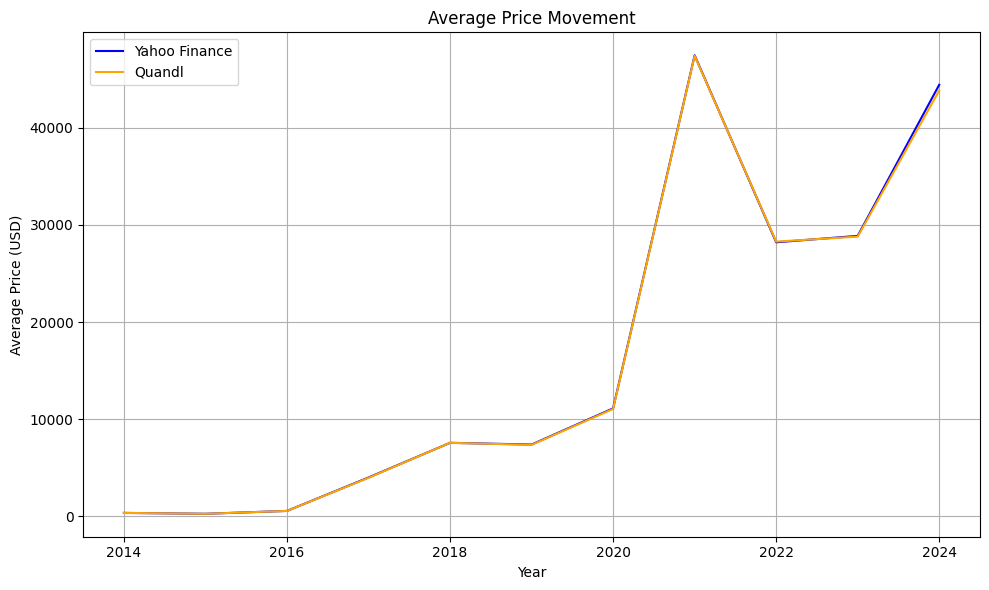

In [114]:
average_prices_yf = mg_df['yf'].resample('Y').mean()
average_prices_quandl = mg_df['quandl'].resample('Y').mean()

plt.figure(figsize=(10, 6))

plt.plot(average_prices_yf.index.year, average_prices_yf.values, color='blue', label='Yahoo Finance')

plt.plot(average_prices_quandl.index.year, average_prices_quandl.values, color='orange', label='Quandl')

plt.title('Average Price Movement')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The crypto boom in 2020-2021 can be attributed to several factors:

- **Increased Institutional Adoption**: Institutional investors, including hedge
funds and corporations, started showing interest in Bitcoin as a hedge against inflation and a store of value. High-profile endorsements from companies like MicroStrategy and Square, as well as the launch of Bitcoin futures by traditional financial institutions, boosted confidence in cryptocurrency.

- **Macro-Economic Factors**: The economic uncertainty caused by the COVID-19 pandemic led to central banks worldwide injecting massive amounts of liquidity into the financial system. Investors sought alternative assets like Bitcoin as a hedge against fiat currency devaluation and inflation.

- **Mainstream Acceptance**: Increased acceptance of cryptocurrencies by mainstream companies and payment processors, such as PayPal allowing users to buy, sell, and hold Bitcoin, contributed to the positive sentiment surrounding cryptocurrencies.

- **Halving Event**: Bitcoin's supply is capped at 21 million coins, and every four years, the reward for mining new coins is halved. The third halving event in May 2020 reduced the rate of new Bitcoin issuance, creating a supply shock and potentially driving up the price due to reduced selling pressure.

- **DeFi and NFTs**: The rise of decentralized finance (DeFi) platforms and non-fungible tokens (NFTs) brought innovation to the cryptocurrency space, attracting new users and investors. DeFi offered new ways to earn yield and participate in lending and borrowing, while NFTs provided unique digital assets and opened up new markets for digital art and collectibles.

### Volume-Price Fluctuations

The ***trading volume*** of a cryptocurrency is gauged by the number of coins or tokens exchanged within a specific period, often expressed as the daily quantity of coins traded.

In [115]:
data_yf.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945
2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,42265.187500,16397498810
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,43989.195312,16092503468
2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,43943.097656,19330573863


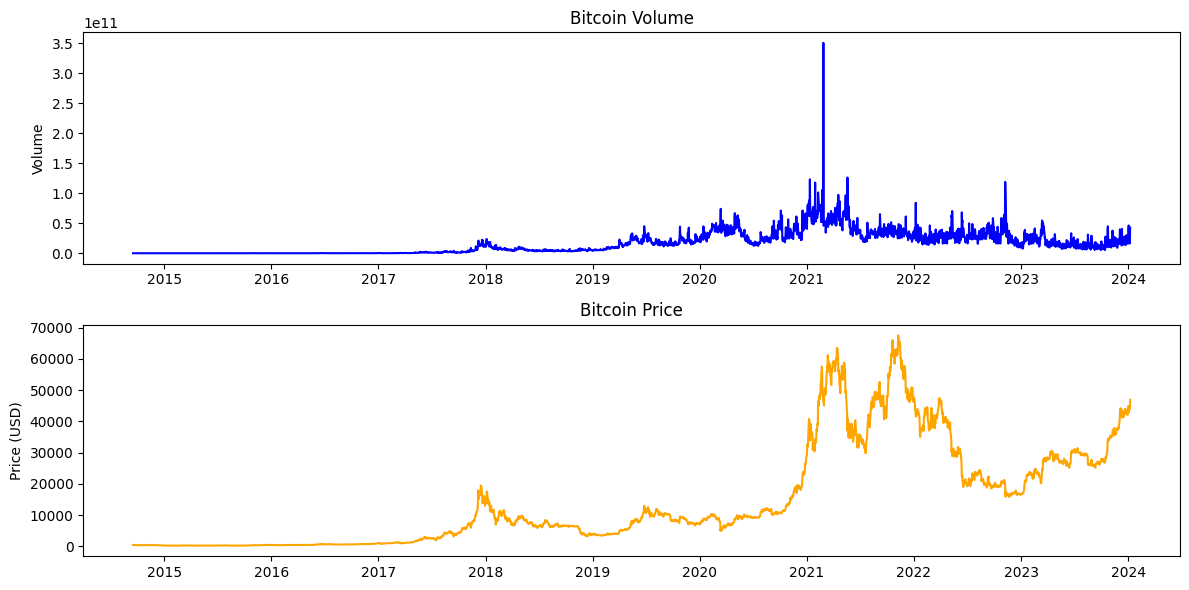

In [116]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data_yf.index, data_yf['Volume'], color='blue')
plt.title('Bitcoin Volume')
plt.ylabel('Volume')

plt.subplot(2, 1, 2)
plt.plot(data_yf.index, data_yf['Close'], color='orange')
plt.title('Bitcoin Price')
plt.ylabel('Price (USD)')

plt.tight_layout()
plt.show()

**2021-BTC Volume Spike Analysis**:-

- Bitcoin price: Up 21% this week, reaching highs near $64,000. This is a significant increase and indicates a return of the "bitcoin bull" trend.
- Volatility: Bitcoin's volatility has surged to an annualized 46%, the highest since November 2021. This suggests a shakier market.
- Trading activity: Derivatives market activity has spiked, with the highest daily trading volume since November 2021. This indicates increased risk appetite and potential for price swings.
- Miner selling: Bitcoin miners are selling more coins, potentially due to the upcoming halving of their rewards and economic factors in China.

**2024-BTC Price Spike Analysis**:-

- Bitcoin Halving: Bitcoin halving is a programmed event that occurs approximately every four years, or after every 210,000 blocks mined. During this event, the reward for miners who validate transactions on the Bitcoin network is halved.

- Reduction in Supply: Bitcoin halving leads to a reduction in the rate at which new Bitcoins are created, effectively reducing the supply of new coins entering circulation. This mechanism is built into the Bitcoin protocol to control inflation and maintain scarcity.

- Impact on Price Volatility: Historically, Bitcoin halving events have been associated with increased price volatility in the short term. Speculation around the potential impact of reduced supply often leads to heightened market activity and price fluctuations.

### Finding Outliers (Abnormal Market Behavior)

Reasons to check for ***Outliers***:

- Market Manipulation: Outliers could indicate instances of market manipulation, such as pump-and-dump schemes or spoofing. These outliers may represent sudden and significant price movements that deviate from the typical trading patterns, suggesting the presence of manipulative activities by certain market participants.

- Extreme Volatility: Bitcoin is known for its price volatility, but outliers may represent particularly extreme price movements that go beyond the normal range of fluctuations. These outliers may signal periods of heightened market uncertainty, panic selling, or irrational exuberance among investors.

- News Events: Outliers in Bitcoin data may coincide with significant news events or announcements that impact market sentiment. For example, regulatory announcements, security breaches, or institutional adoption news could trigger outlier price movements as traders react to the new information.

- Technical Glitches: Occasionally, outliers in Bitcoin data may be caused by technical glitches or errors in data reporting. While these outliers may not necessarily reflect actual market dynamics, they can still provide insights into the reliability of data sources and the robustness of trading platforms.

- Arbitrage Opportunities: Outliers in Bitcoin prices across different exchanges may indicate arbitrage opportunities for traders. Large price disparities between exchanges could signal inefficiencies in the market and opportunities for profit through buying on one exchange and selling on another.

A boxplot is a standardized way of displaying the distribution of data based on a five number summary:

- median (Q2/50th Percentile): the middle value of the dataset.

- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

- maximum: Q3 + 1.5*IQR

- minimum: Q1 - 1.5*IQR

IQR: 25th to the 75th percentile

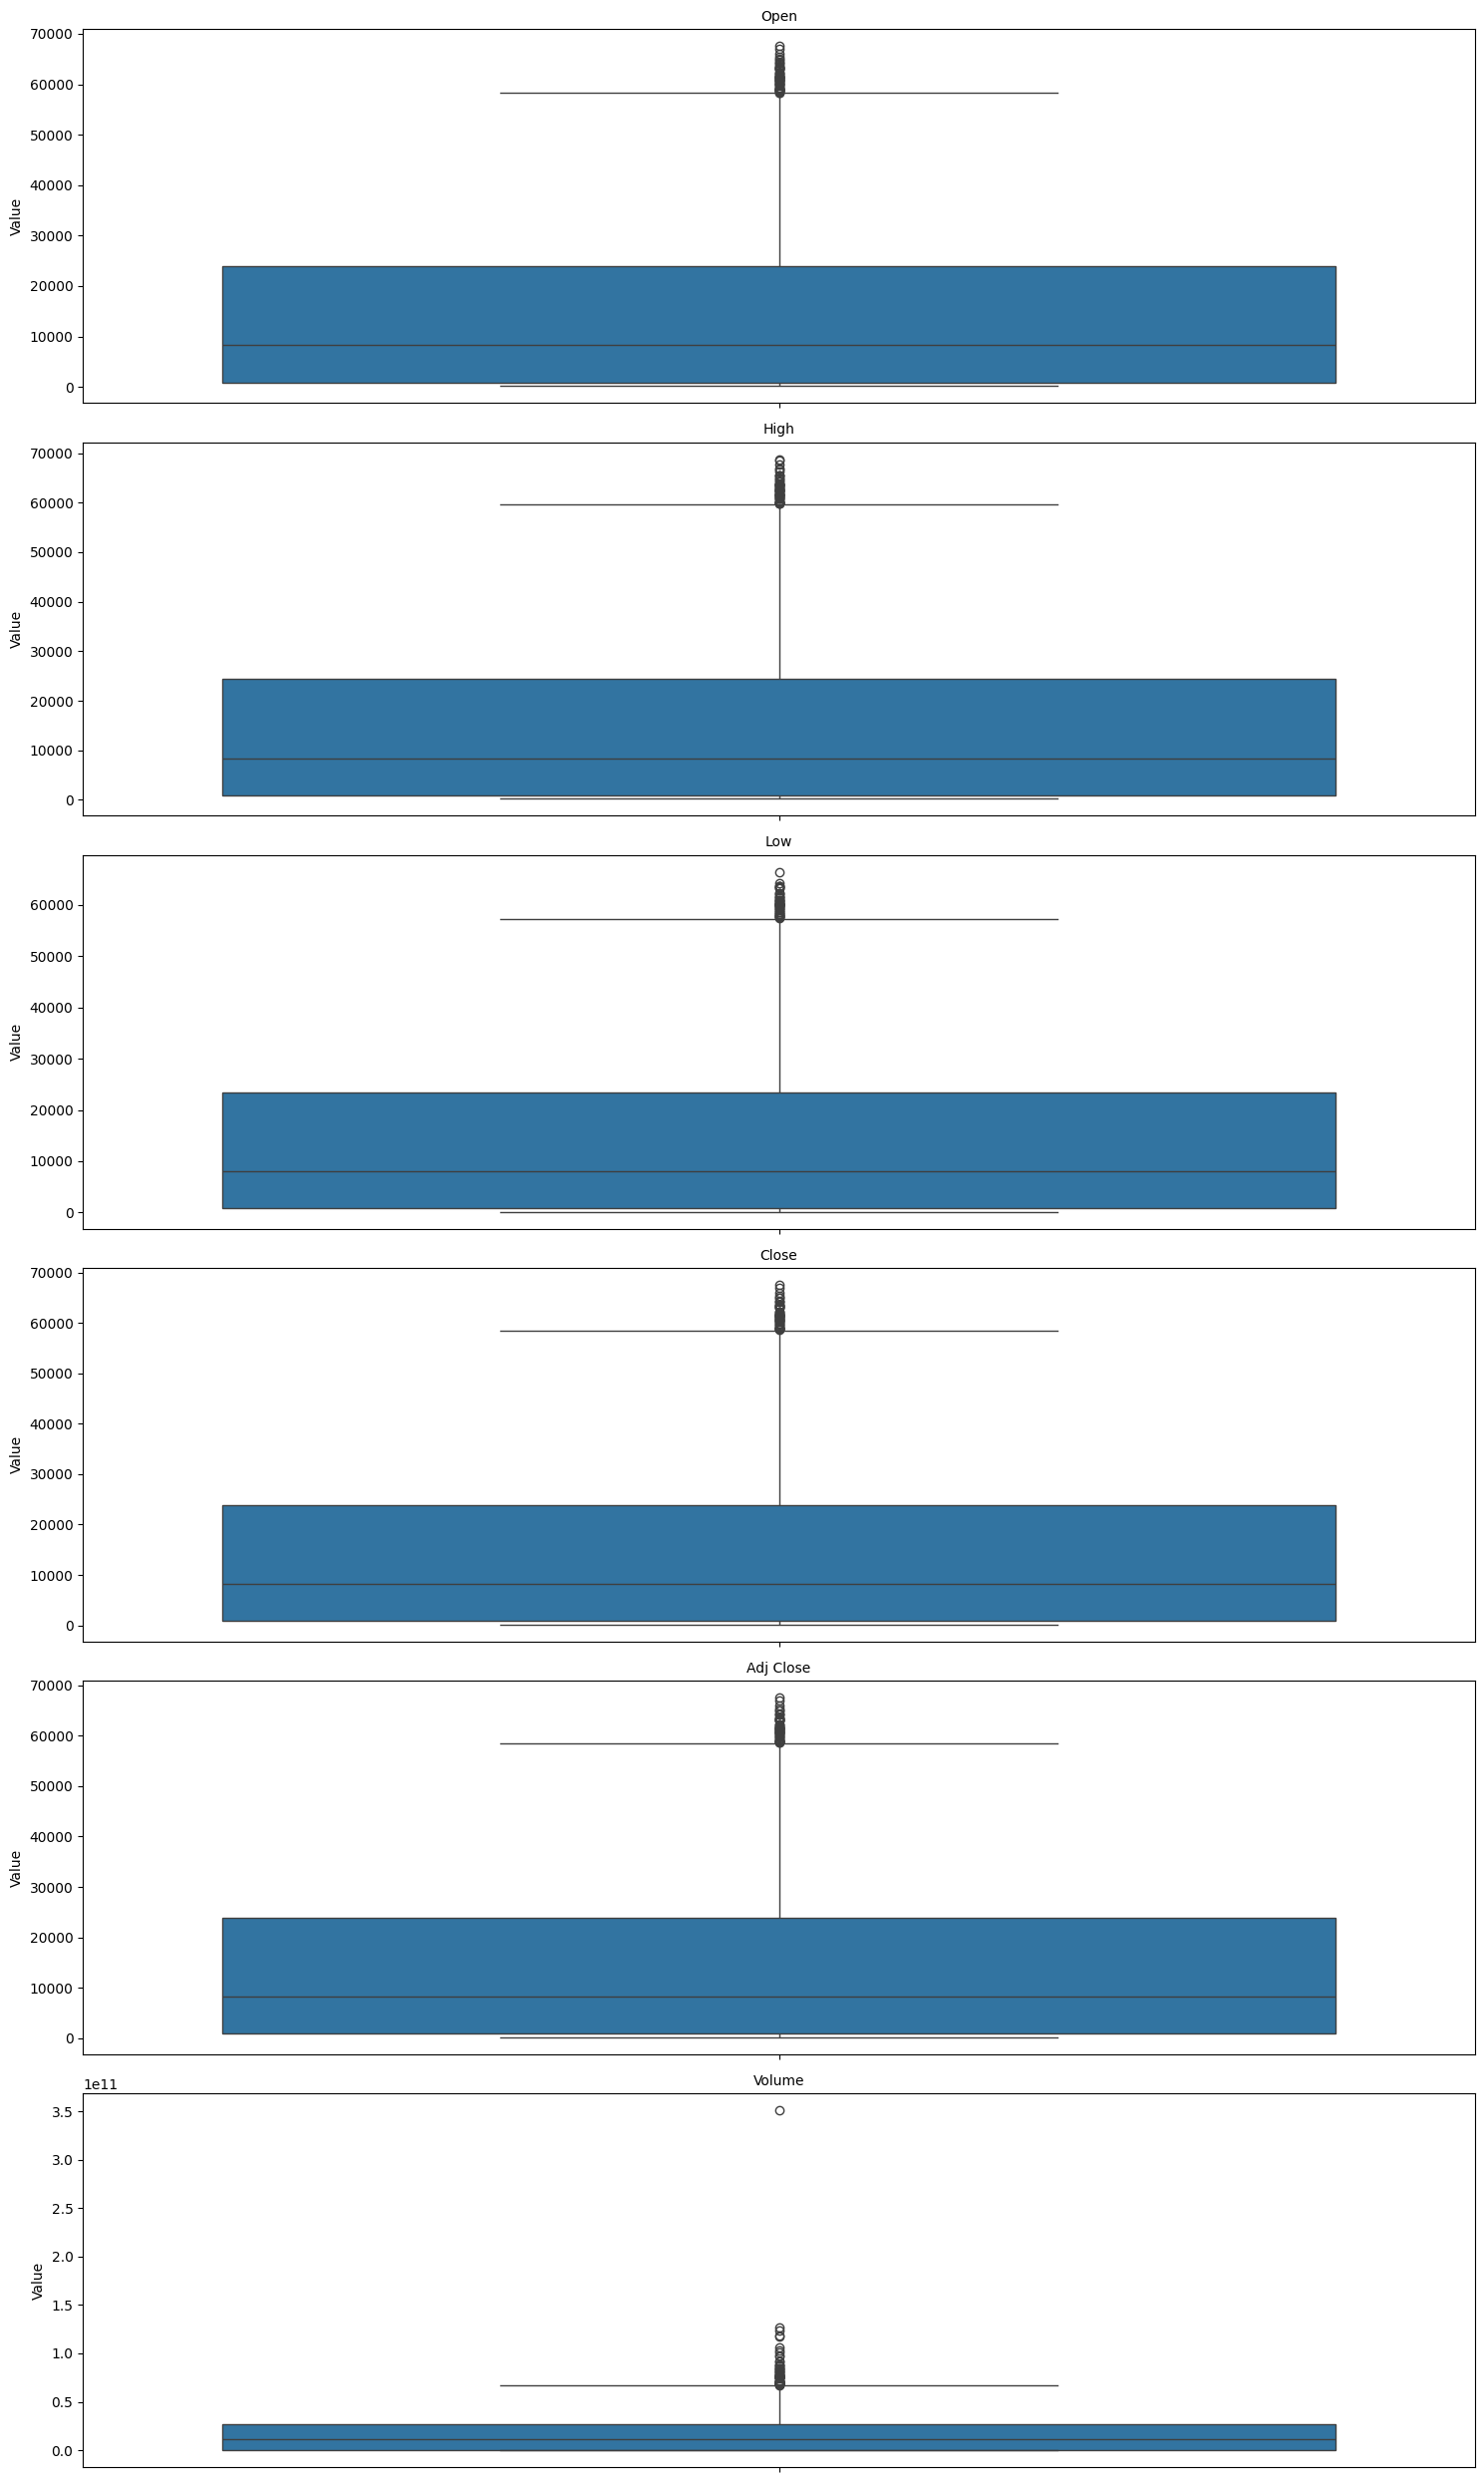

In [117]:
col_names = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, ax = plt.subplots(len(col_names), figsize=(15, 25))

for i, col_val in enumerate(col_names):
    sns.boxplot(y=data_yf[col_val], ax=ax[i])
    ax[i].set_title(col_val, fontsize=10)
    ax[i].set_ylabel('Value', fontsize=10)

plt.tight_layout()
plt.show()

In [118]:
col_names = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

df = pd.DataFrame(data_yf, index=data_yf.index, columns=col_names)

outlier_range_max = {}
outlier_range_min = {}

df_description = df.describe()
for col_name in col_names:
    q1 = df_description[col_name]['25%']
    q3 = df_description[col_name]['75%']
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    outlier_range_min[col_name] = fence_low
    fence_high = q3 + 1.5 * iqr
    outlier_range_max[col_name] = fence_high

def remove_outliers(df_in, col_names):
    q1 = df_in[col_names].quantile(0.25)
    q3 = df_in[col_names].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_names] > fence_low) & (df_in[col_names] < fence_high)]
    return df_out

filtered = df.apply(lambda x: x[(x.values > outlier_range_min[x.name]) & (x.values < outlier_range_max[x.name])], axis=0)

**Number of outliers eliminated**:

In [119]:
filtered.isna().sum()

Open         54
High         52
Low          49
Close        50
Adj Close    50
Volume       61
dtype: int64

**creating new dataset without outliers**:


In [120]:
new_df = filtered.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3398 entries, 2014-09-17 to 2024-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3344 non-null   float64
 1   High       3346 non-null   float64
 2   Low        3349 non-null   float64
 3   Close      3348 non-null   float64
 4   Adj Close  3348 non-null   float64
 5   Volume     3337 non-null   float64
dtypes: float64(6)
memory usage: 185.8 KB


In [121]:
#Dropping the null values
new_df.dropna(inplace=True)

### Candlestick Chart (2023-2024)

**Candlestick Charts** are a type of financial chart for tracking the movement of securities. Candlesticks are so named because the rectangular shape and lines on either end resemble a candle with wicks.

Each candlestick represents one day’s worth of price data about a stock through four pieces of information: the opening price, the closing price, the high price, and the low price. The color of the central rectangle (called the real body) tells investors whether the opening price or the closing price was higher.

In [122]:
period_df = new_df.loc['2023-01-01':'2024-12-31']

candlestick = go.Candlestick(x=period_df.index,
                             open=period_df['Open'],
                             high=period_df['High'],
                             low=period_df['Low'],
                             close=period_df['Adj Close'],
                             name='Candlestick')

layout = go.Layout(title='Candlestick Chart for 2023-2024',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

fig = go.Figure(data=[candlestick], layout=layout)
fig.show()

## Feature Engineering

### Creating Features

**OBV (On-Balance Volume)**:

- On-Balance Volume (OBV) is a momentum indicator that uses volume flow to predict changes in stock price. It measures buying and selling pressure.
- The formula calculates OBV by cumulatively summing the volume based on whether the closing price is higher or lower than the previous closing price.
- If the closing price is higher than the previous close, the current volume is added to the OBV.
- If the closing price is lower than the previous close, the current volume is subtracted from the OBV.
- This cumulative sum gives an indication of the overall volume flow, helping to confirm price trends.

**Cumulative Price-Volume Product**:

- This feature calculates the cumulative product of the average price (calculated as the average of high, low, and close prices) and the volume for each day.
- It represents the total value of trading activity for each day, considering both price and volume.

**Cumulative Volume**:

- This feature calculates the cumulative sum of the volume over time.
= It represents the total volume traded up to each day.

**VWAP (Volume Weighted Average Price)**:

- VWAP is a trading benchmark used by traders to determine the average price a security has traded at throughout the day, based on both volume and price.
- It is calculated by dividing the cumulative price-volume product by the cumulative volume.
- VWAP gives a more accurate representation of the average price paid by traders because it takes into account both the price and volume of trades.

In [123]:
# Calculate OBV
new_df['OBV'] = (new_df['Volume'] * ((new_df['Close'] - new_df['Open']) / (new_df['High'] - new_df['Low']))).cumsum()

# Calculate Cumulative Price-Volume Product
new_df['Cumulative Price-Volume Product'] = ((new_df['High'] + new_df['Low'] + new_df['Close']) / 3) * new_df['Volume']

# Calculate Cumulative Volume
new_df['Cumulative Volume'] = new_df['Volume'].cumsum()

# Calculate VWAP
new_df['VWAP'] = new_df['Cumulative Price-Volume Product'] / new_df['Cumulative Volume']

In [124]:
new_df.head(5)

,Open,High,Low,Close,Adj Close,Volume,OBV,Cumulative Price-Volume Product,Cumulative Volume,VWAP
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,-1.140264e+07,9.671599e+09,21056800.0,459.310008
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-3.695217e+07,1.487840e+10,55540000.0,267.886158
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-6.261583e+07,1.525842e+10,93459700.0,163.262021
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,-4.691518e+07,1.501679e+10,130323300.0,115.227229
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-5.971007e+07,1.067127e+10,156903400.0,68.011734


### Plotting Heatmap

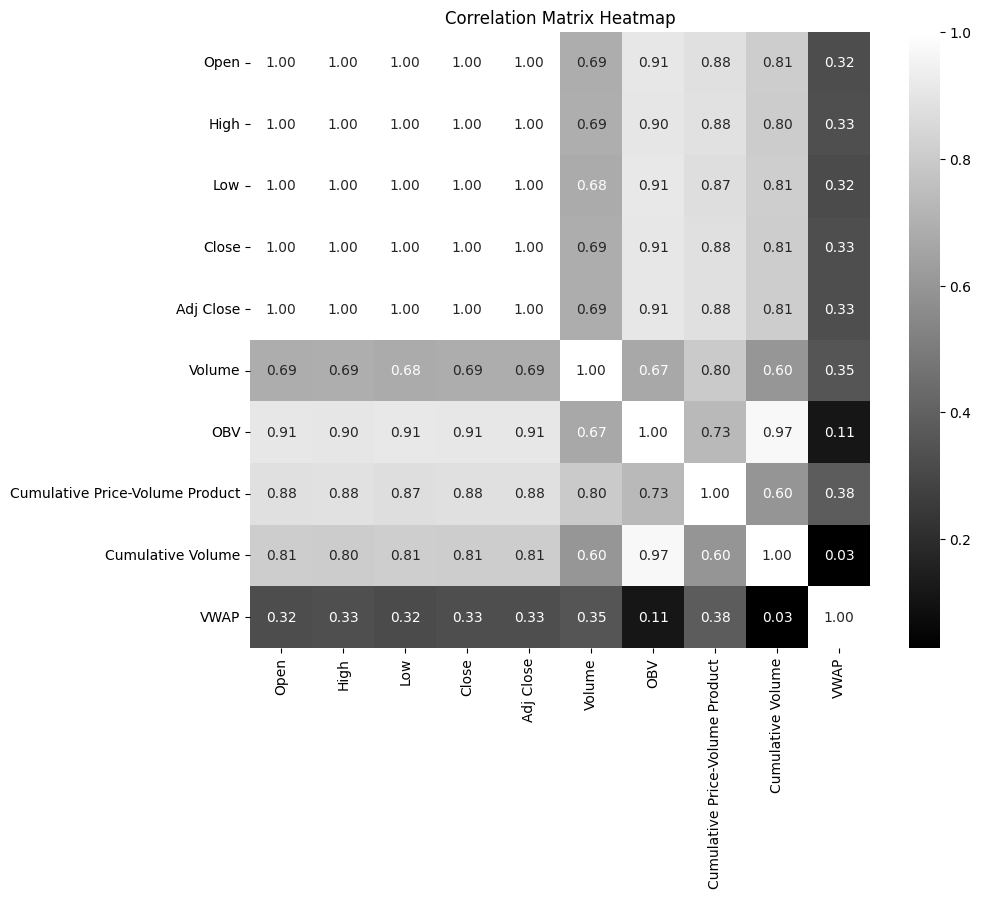

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(), cmap='gray', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

From the correlation matrix you provided, we can see that the following features have relatively high correlation with the price (Close or Adj Close):

- Open
- High
- Low
- Volume
- OBV (On-Balance Volume)
- Cumulative Price-Volume Product

In [126]:
correlated_features = ['Open', 'High', 'Low', 'Volume', 'OBV', 'Adj Close', 'Cumulative Price-Volume Product']
predict_df = new_df[correlated_features].copy()

In [127]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3276 entries, 2014-09-17 to 2024-01-08
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Open                             3276 non-null   float64
 1   High                             3276 non-null   float64
 2   Low                              3276 non-null   float64
 3   Volume                           3276 non-null   float64
 4   OBV                              3276 non-null   float64
 5   Adj Close                        3276 non-null   float64
 6   Cumulative Price-Volume Product  3276 non-null   float64
dtypes: float64(7)
memory usage: 333.8 KB


## Model Development and Evaluation

### LSTM Model

Since we are using a time series dataset, it is not viable to use a feedforward-only neural network as tomorrow’s BTC price is most correlated with today’s, not a month ago’s.

A recurrent neural network (RNN) is a class of artificial neural network where connections between nodes form a directed graph along a sequence.
An RNN shows temporal dynamic behavior for a time sequence and it can use its internal state to process sequences.

Time series forecasting is quite different from other machine learning models because:
1. It is time dependent.
2. Along with an increasing or decreasing trend, most time series have some form of seasonality trends, i.e. variations specific to a particular time frame.

**Long Short Term Memory networks (LSTM)** are a special kind of RNN (Recurrent Neural Network) capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997) and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

In [128]:
values = predict_df['Adj Close'].values.reshape(-1, 1)
values = values.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

prediction_days = 120

# Split the data into train and test sets
train = scaled[:len(scaled) - prediction_days]
test = scaled[len(scaled) - prediction_days:]
print(len(train), len(test))

# Define a function to create X inputs and Y labels
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

# Generate dataset for trainX, trainY, testX, testY
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape X for model training
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(trainX, trainY,
                    epochs=1000, batch_size=200,
                    validation_data=(testX, testY),
                    verbose=0, shuffle=False)

3156 120
3155
119


On the plot below we compare the Train and Test loss on each iteration of the training process. We can see, that after some iterations the train and test loss became very similar, which is a good sign (this means we are not overfitting the train set).

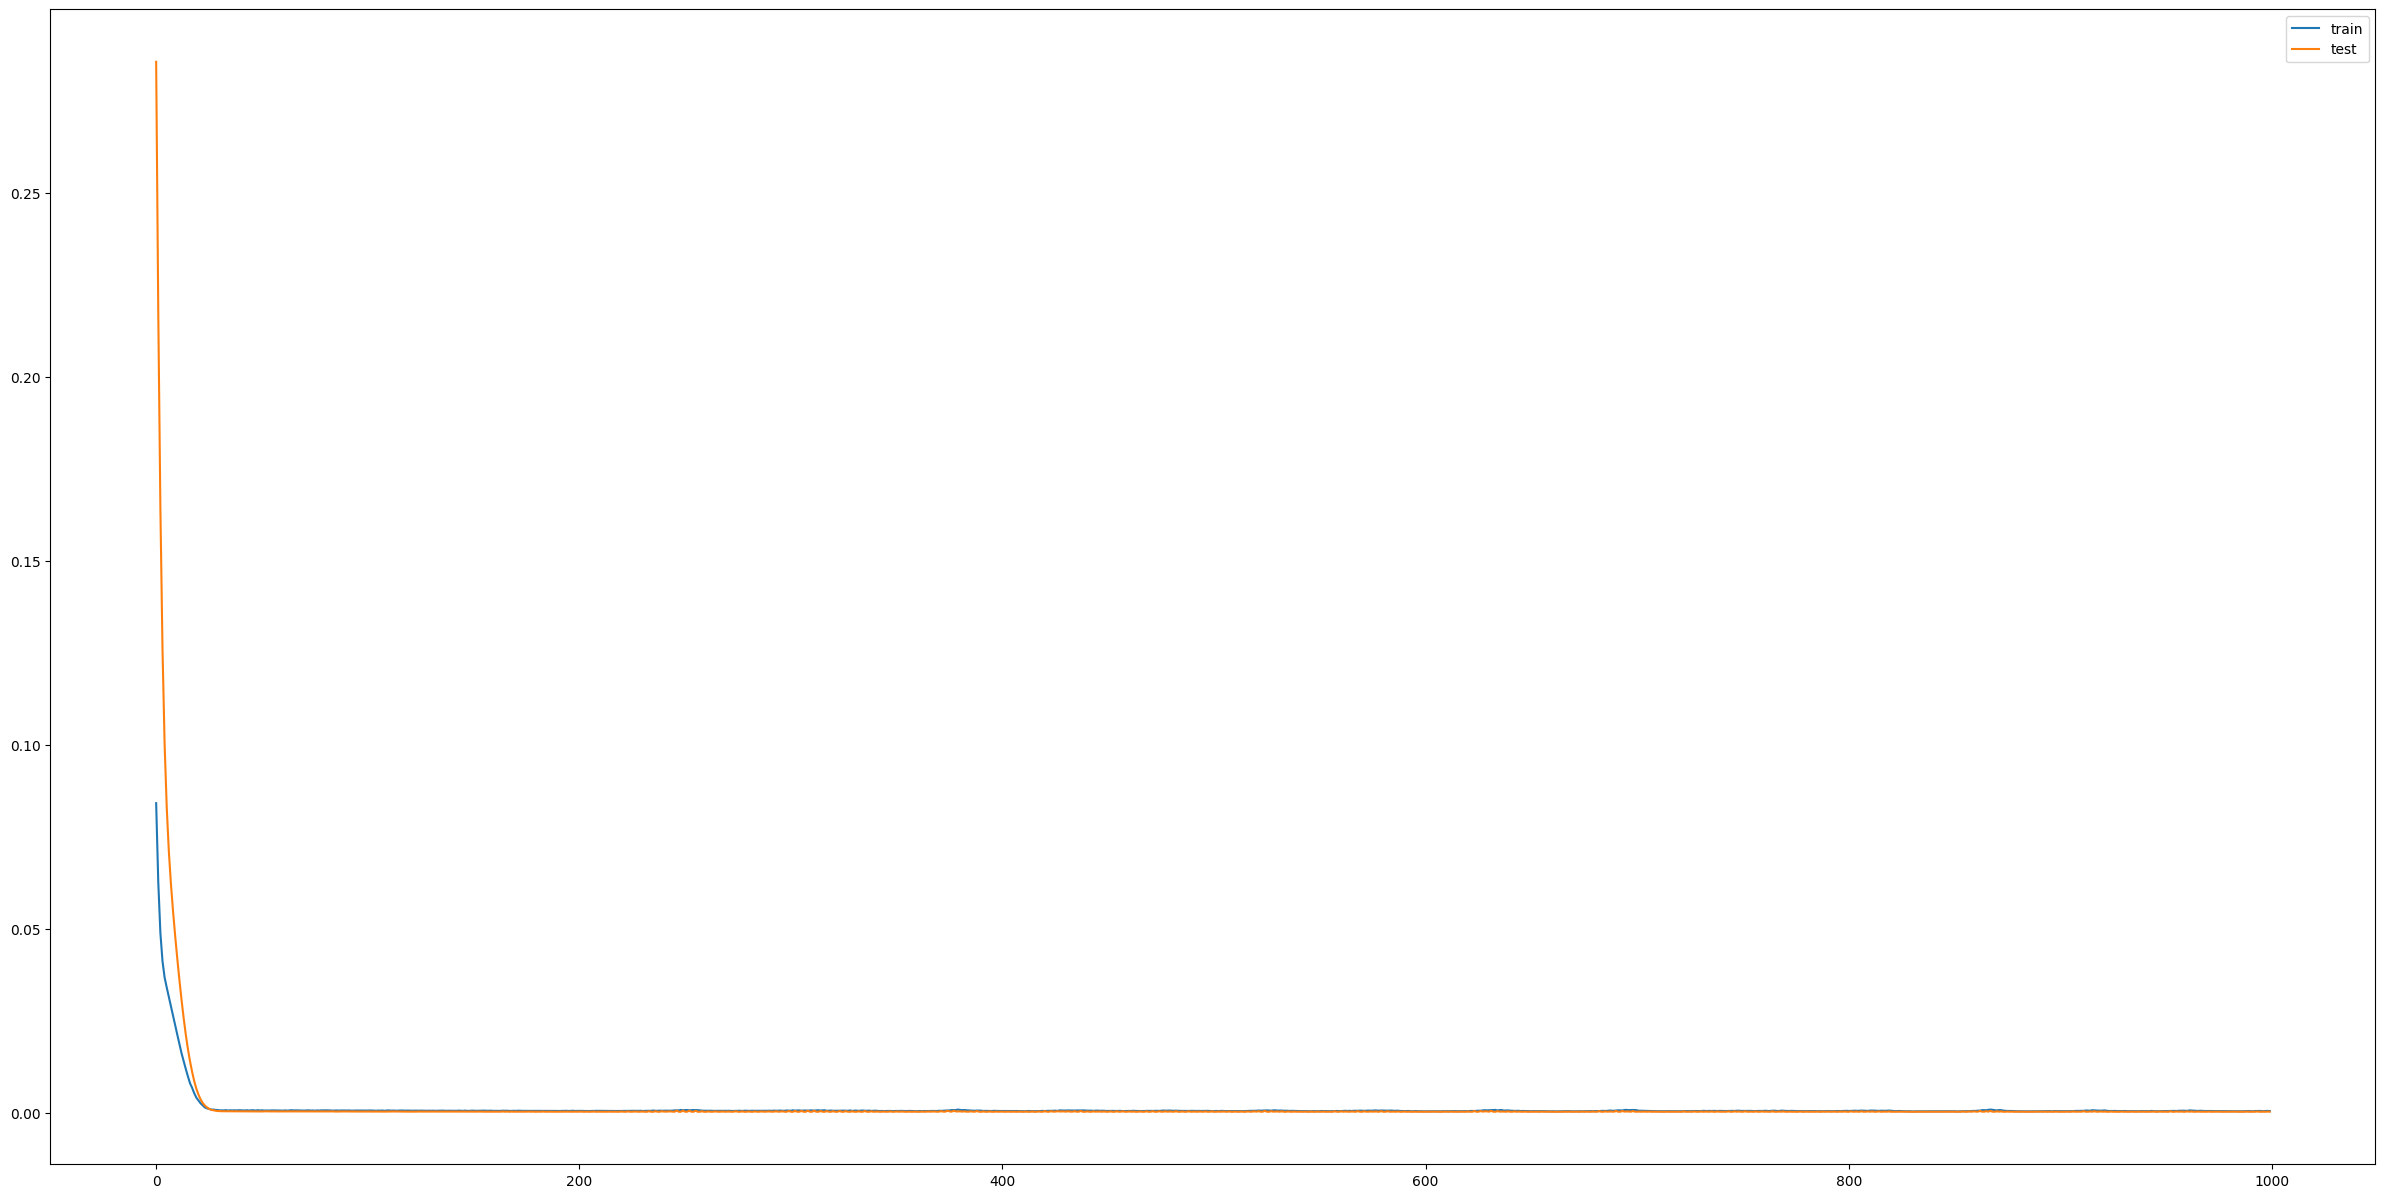

In [129]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

We make prediction using **textX** and plotting line graph against **testY**.

4/4 [==============================] - 0s 3ms/step


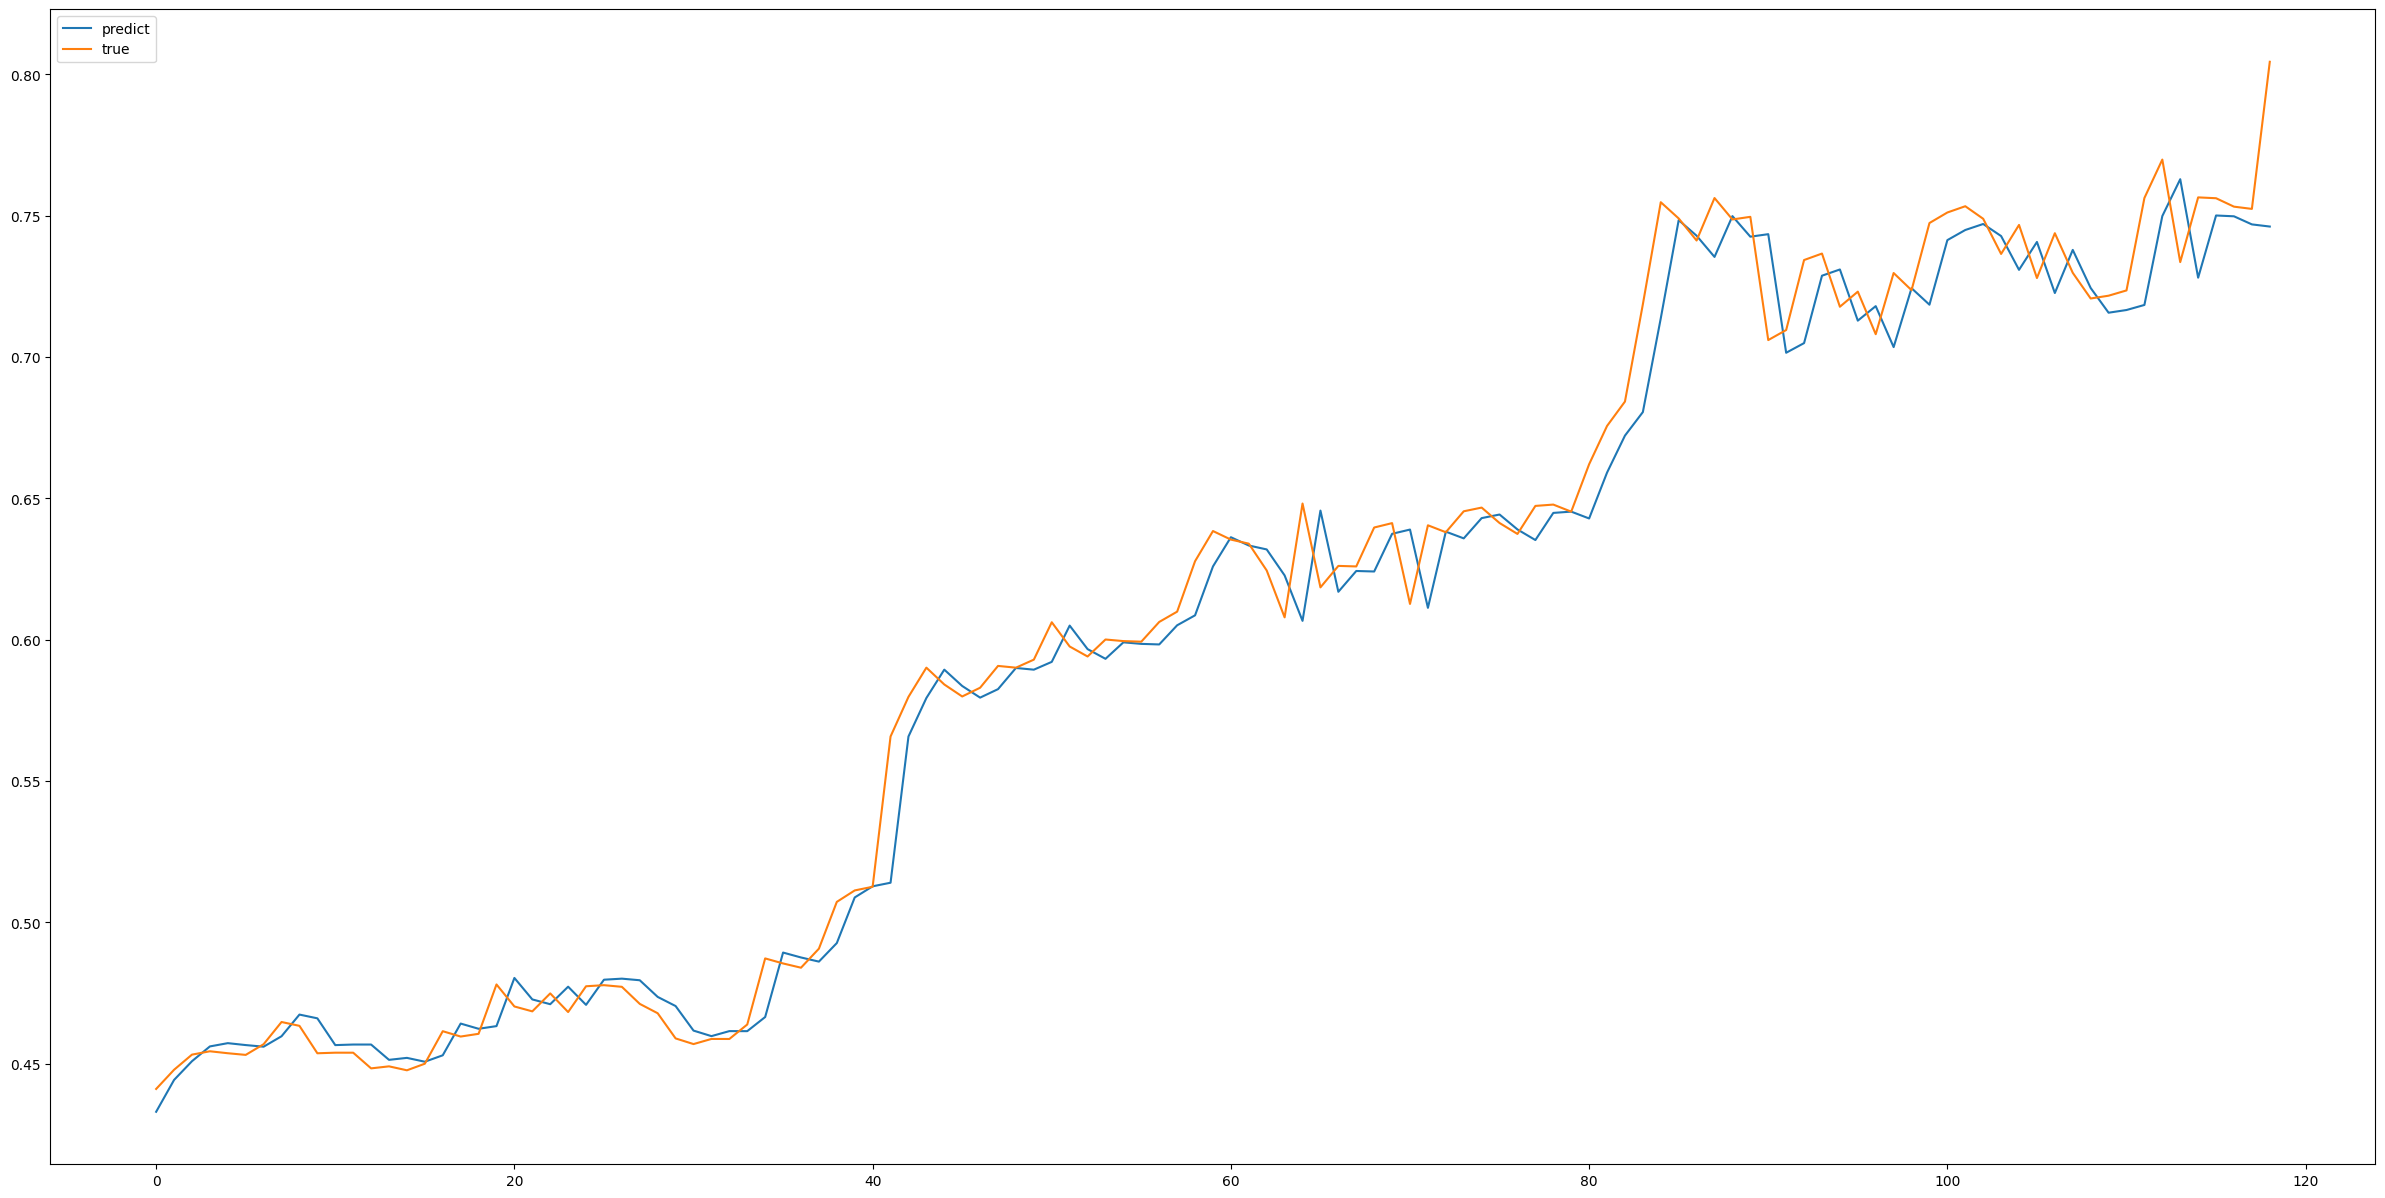

In [130]:
pvals = model.predict(testX)
pyplot.plot(pvals, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

We scaler Inverse **Y** back to normal value:

In [131]:
pvals_inverse = scaler.inverse_transform(pvals.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [132]:
mae = mean_absolute_error(testY_inverse, pvals_inverse)
print('MAE: %.3f' % mae)
mse = mean_squared_error(testY_inverse, pvals_inverse)
print('MSE: %.3f' % mse)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

MAE: 601.012
MSE: 791114.722
RMSE: 889.446


- MAE (Mean Absolute Error): This metric measures the average absolute difference between the predicted and true values. In your case, the MAE is 601.012, which means, on average, your model's predictions are off by approximately $601.012.

- MSE (Mean Squared Error): MSE measures the average squared difference between the predicted and true values. It penalizes larger errors more heavily than MAE. Your MSE is 791114.722.

- RMSE (Root Mean Squared Error): RMSE is the square root of MSE and provides an interpretable measure of the average magnitude of error. In your case, the RMSE is 889.446, indicating that, on average, the model's predictions are off by approximately $889.446.

We plot line graph with _Y_ as _USD_.

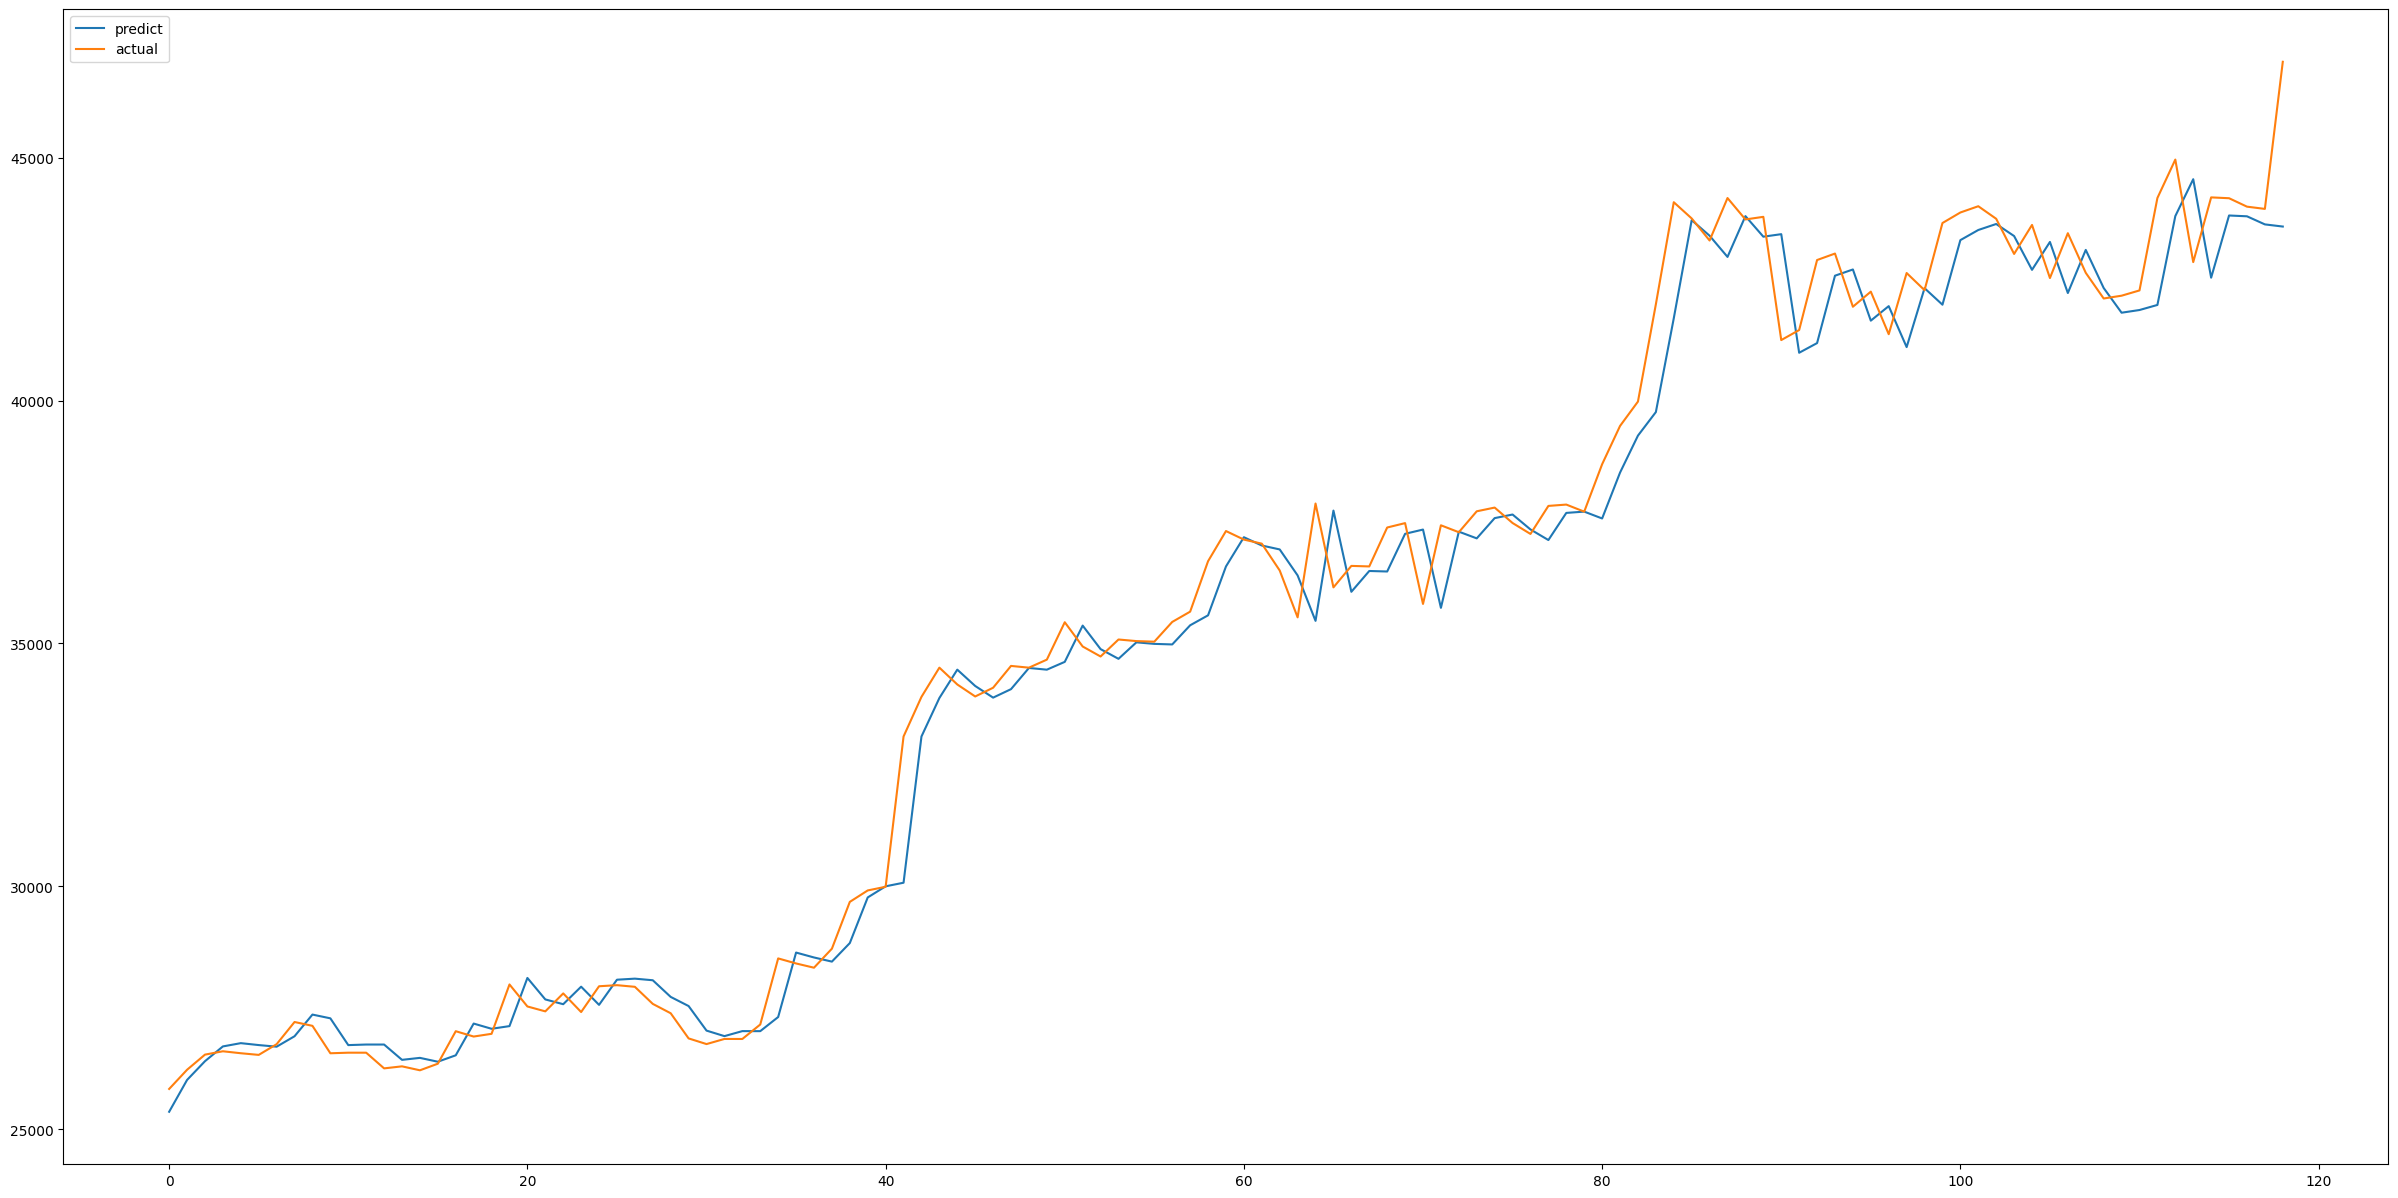

In [133]:
pyplot.plot(pvals_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual')
pyplot.legend()
pyplot.show()

In [134]:
predictDates = predict_df.tail(len(testX)).index
testY_reshape = testY_inverse.reshape(len(testY_inverse))
pvals_reshape = pvals_inverse.reshape(len(pvals_inverse))

actual_trace = go.Scatter(x=predictDates, y=testY_reshape, mode='lines', name='Actual Price')
predict_trace = go.Scatter(x=predictDates, y=pvals_reshape, mode='lines', name='Predicted Price')

layout = go.Layout(title='Actual vs Predicted Price',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

fig = go.Figure(data=[actual_trace, predict_trace], layout=layout)
pio.show(fig)

#### SMAPE

Let’s calculate a symmetric mean absolute percentage error (SMAPE). It will show how good our predictions are in percentage. We define function *symmetric_mean_absolute_percentage_error* which will perform all necessary calculations:

$SMAPE=\frac {100\%}{n}\sum_{t=1}^{n}{\frac{\left|F_{t}-A_{t}\right|}{(|A_{t}|+|F_{t}|)/2}}$

where $F_t$ is the forecast value and $A_t$ is the actual value.

In [135]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred))/2)) * 100

SMAPE = symmetric_mean_absolute_percentage_error(testY_inverse, pvals_inverse)

print('Test SMAPE (percentage): %.3f' % SMAPE)

Test SMAPE (percentage): 1.642


In [136]:
predict_df.tail()

,Open,High,Low,Volume,OBV,Adj Close,Cumulative Price-Volume Product
Date,,,,,,,
2024-01-04,42855.816406,44770.023438,42675.175781,3.044809e+10,2.343985e+12,44179.921875,1.335911e+15
2024-01-05,44192.980469,44353.285156,42784.718750,3.233603e+10,2.343360e+12,44162.691406,1.415248e+15
2024-01-06,44178.953125,44227.632812,43475.156250,1.609250e+10,2.339302e+12,43989.195312,7.064179e+14
2024-01-07,43998.464844,44495.570312,43662.230469,1.933057e+10,2.338018e+12,43943.097656,8.511954e+14
2024-01-08,43948.707031,47218.000000,43244.082031,4.274619e+10,2.370522e+12,46970.503906,1.958240e+15


#### Predicting values for next 5 days

In [137]:
last_data_points = scaled[-look_back:]

input_data = last_data_points.reshape(1, 1, look_back)

predicted_values_scaled = []

for _ in range(5):
    predicted_value_scaled = model.predict(input_data)

    predicted_values_scaled.append(predicted_value_scaled)

    input_data = np.append(input_data[:, :, 1:], predicted_value_scaled).reshape(1, 1, look_back)

predicted_values_scaled = np.array(predicted_values_scaled).reshape(-1, 1)

predicted_values = scaler.inverse_transform(predicted_values_scaled)

last_date = data.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='D')

print("Predicted BTC Prices for the Next 5 Days:")
for i, date in enumerate(next_dates):
    print(f"{date.date()}: {predicted_values[i][0]}")

1/1 [==============================] - 0s 14ms/step
Predicted BTC Prices for the Next 5 Days:
2024-01-09: 46481.8203125
2024-01-10: 46014.2109375
2024-01-11: 45566.47265625
2024-01-12: 45137.484375
2024-01-13: 44726.20703125


### ARIMA Model

A time series is a sequence where a metric is recorded over regular time intervals. Forecasting a time series (like demand and sales) is often of tremendous commercial value.

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary.

We can check stationarity using the following:

1. __Plotting Rolling Statistics__: Plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant _t_, we’ll take the average/variance of the last year, i.e. last 12 months (this is a visual technique)

2. __Dickey-Fuller Test__: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the "Test Statistic" is less than the "Critical Value", we can reject the null hypothesis and say that the series is stationary. Statistical tests make strong assumptions about your data

_Null Hypothesis (H0)_: If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

_Alternate Hypothesis (H1)_: The null hypothesis is rejected, it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure. We interpret this result using the p-value from the test.

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

- _p-value > 0.05_: Accept the null hypothesis _(H0)_, the data has a unit root and is non-stationary.

- _p-value <= 0.05_: Reject the null hypothesis _(H0)_, the data does not have a unit root and is stationary.

__ARIMA__ model is implemented to compare its predictability with the LSTM and figure out which is the most suitable method for time series data which has huge fluctuations.

An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- __AR__: Autoregression: A model that uses the dependent relationship between an observation and some number of lagged observations
- __I__: Integrated: The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary
- __MA__: Moving Average: A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations



A standard notation is used of ARIMA (p, d, q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- __p__: The number of lag observations included in the model, also called the lag order
- __d__: The number of times that the raw observations are differenced, also called the "degree of differencing"
- __q__: The size of the moving average window, also called the order of moving average

An importance concern here is how to determine the value of 'p' and 'q'. We use two plots to determine these numbers:

- __Autocorrelation Function (ACF)__: It is a measure of the correlation between the the TS with a lagged version of itself

- __Partial Autocorrelation Function (PACF)__: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons

#### Test Stationarity

In [138]:
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import acf, pacf

In [139]:
def test_stationarity(timeseries):

    # Rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plotting rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Dickey-Fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [140]:
ts = predict_df['Adj Close']

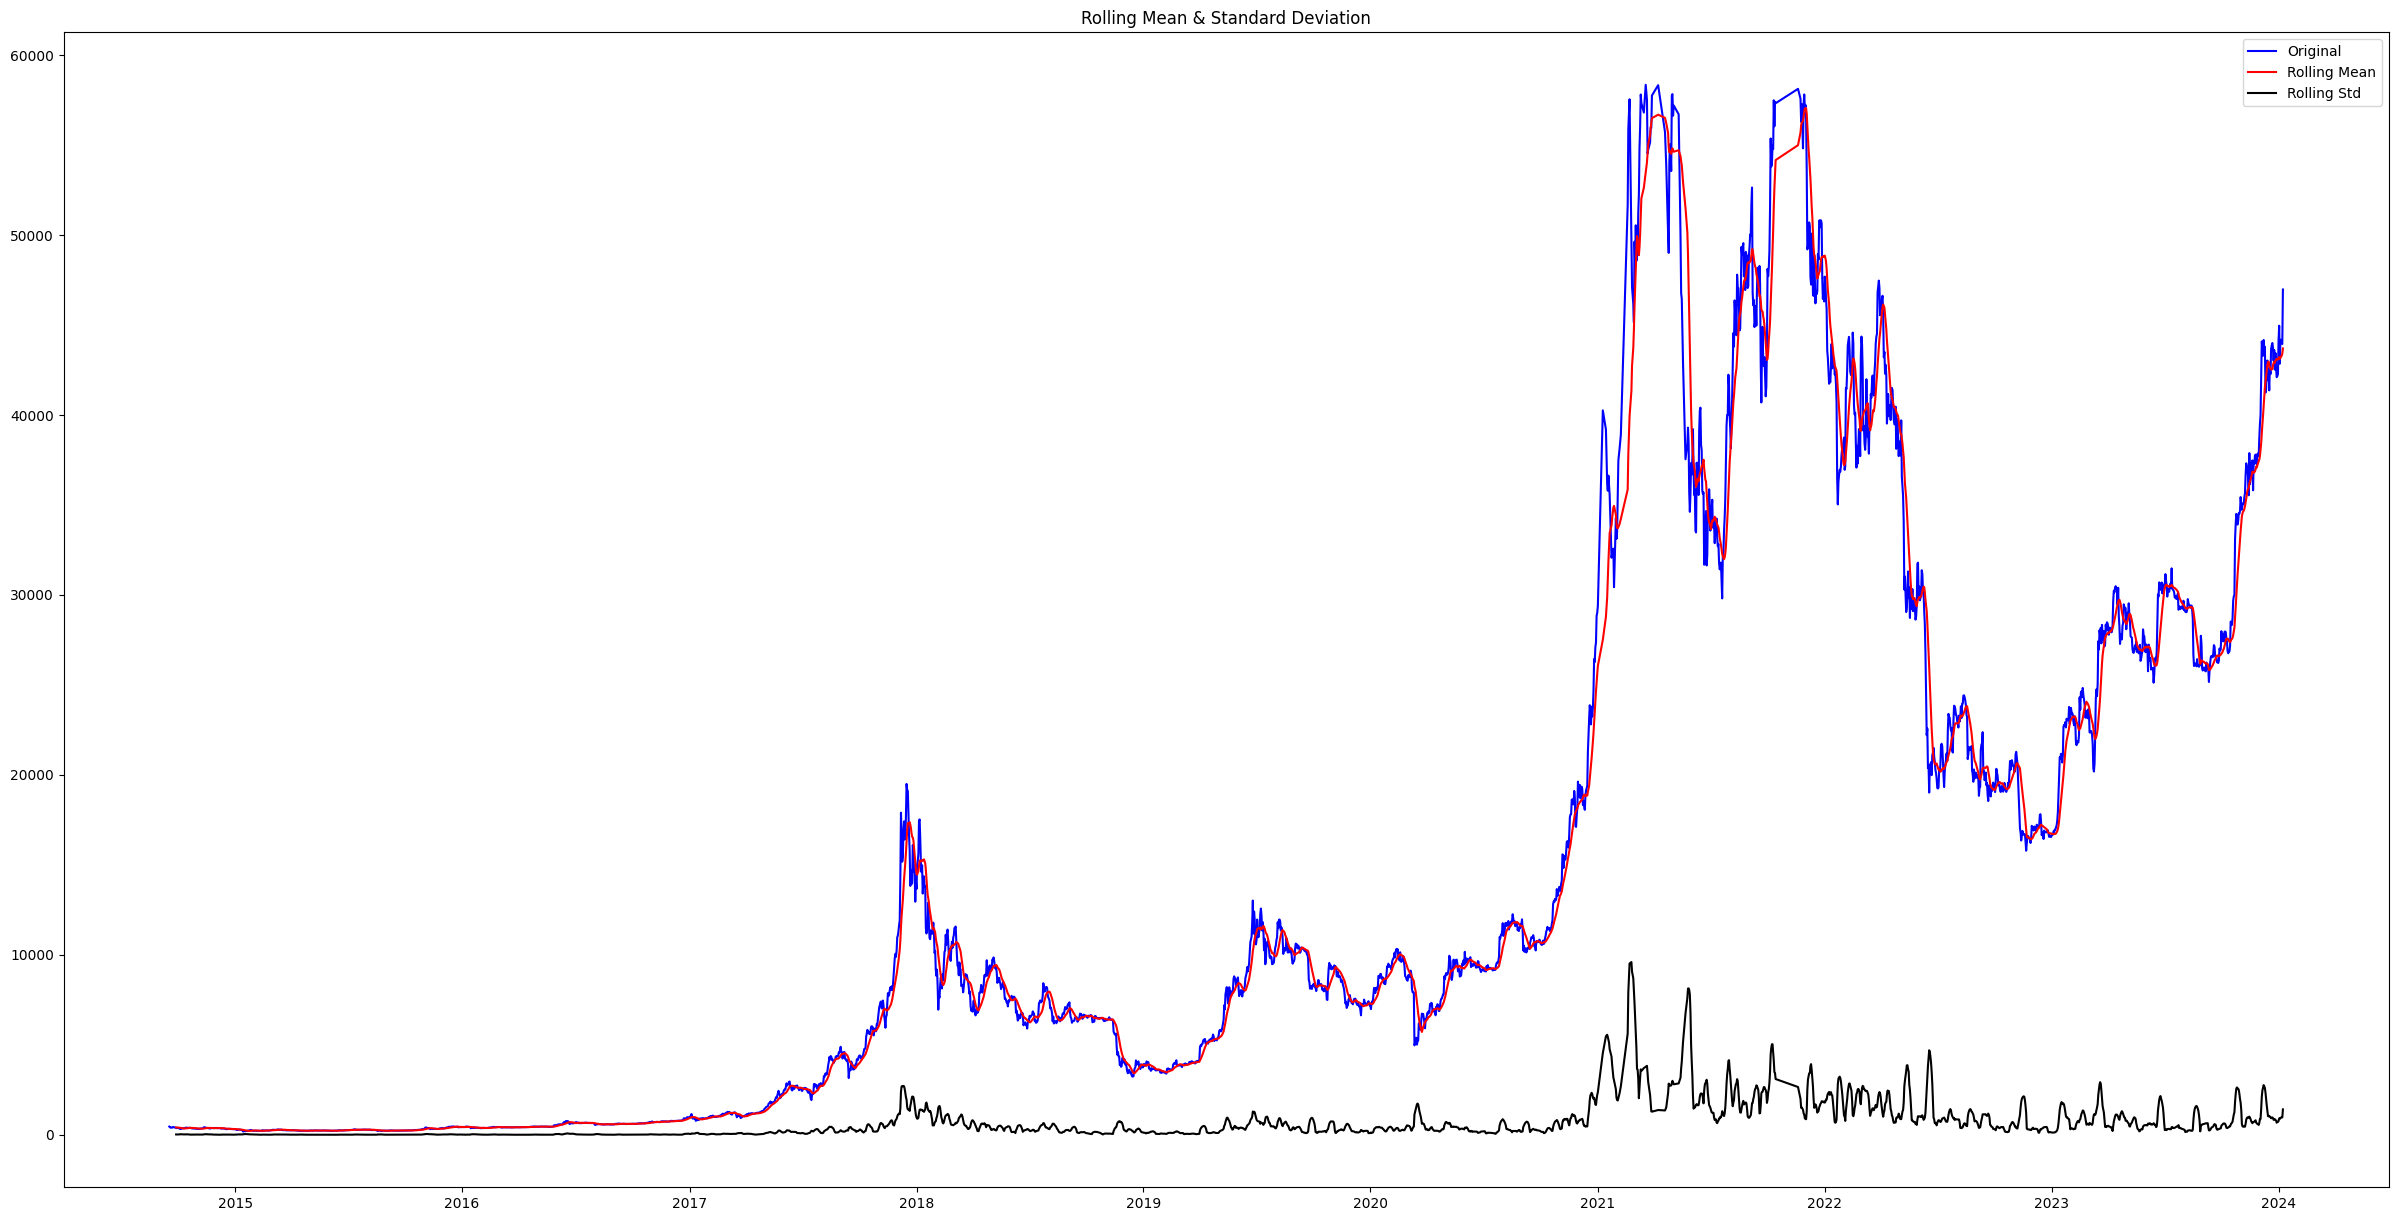

Results of Dickey-Fuller Test:
Test Statistic                   -1.097891
p-value                           0.715912
#Lags Used                       29.000000
Number of Observations Used    3246.000000
Critical Value (1%)              -3.432366
Critical Value (5%)              -2.862431
Critical Value (10%)             -2.567244
dtype: float64


In [141]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
rcParams['figure.figsize'] = 30, 15
test_stationarity(ts)

The series isn't stationary. There are two major reasons behind non-stationarity of a TS:

1. Trend: varying mean over time
2. Seasonality: variations at specific time-frames

There are two ways of removing trend and seasonality:

- Differencing: taking the differece with a particular time lag
- Decomposition: modeling both trend and seasonality and removing them from the model.

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity.

Log transformation is used to unskew highly skewed data, thus helping in forecasting process.

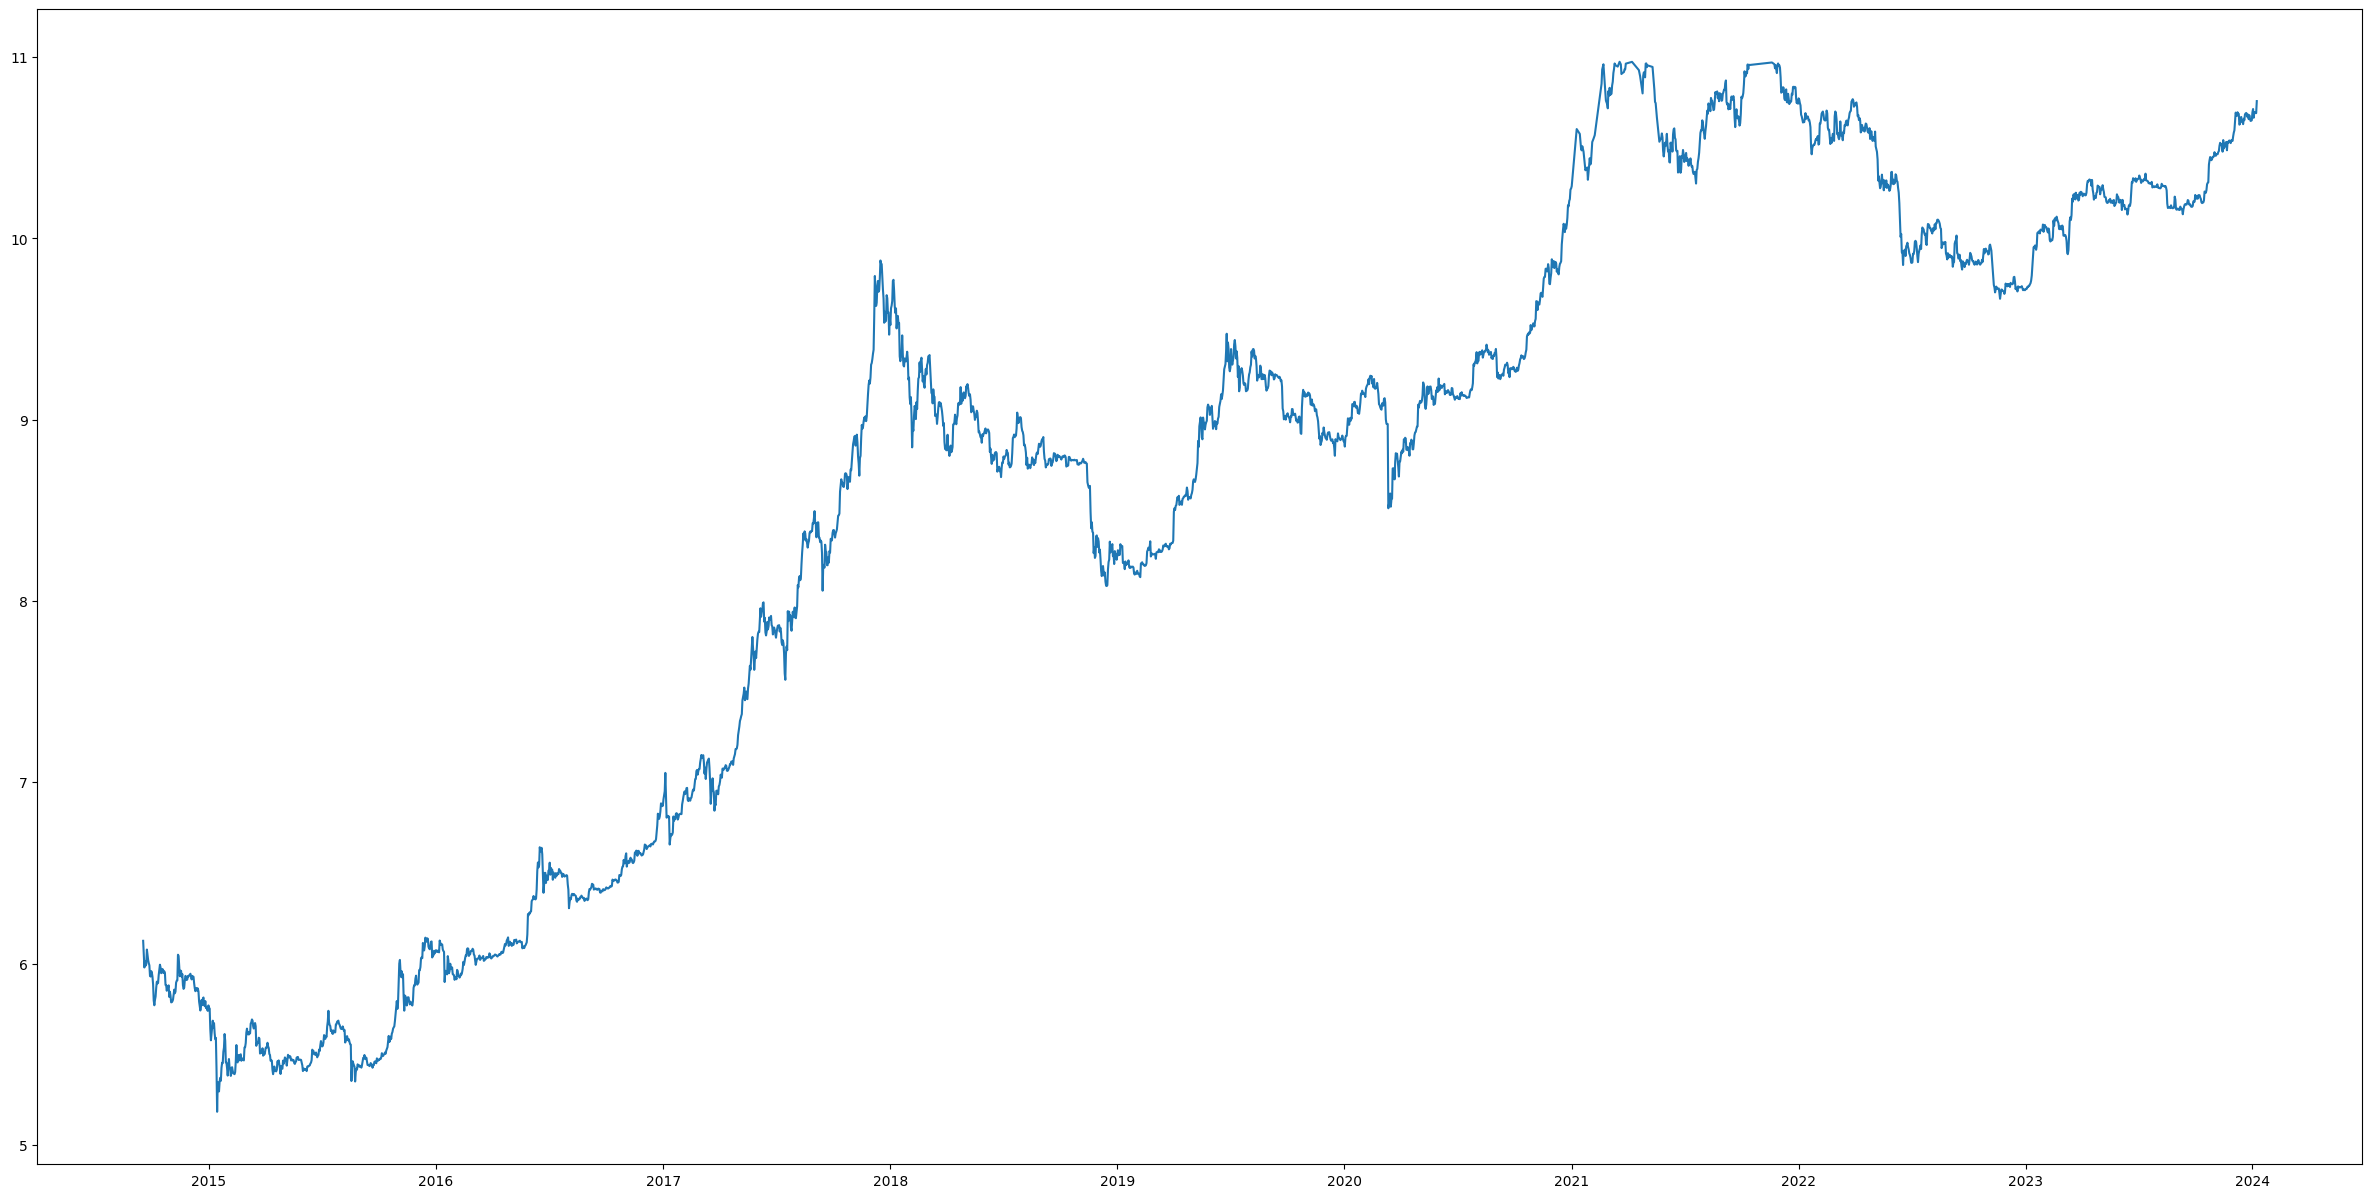

In [142]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

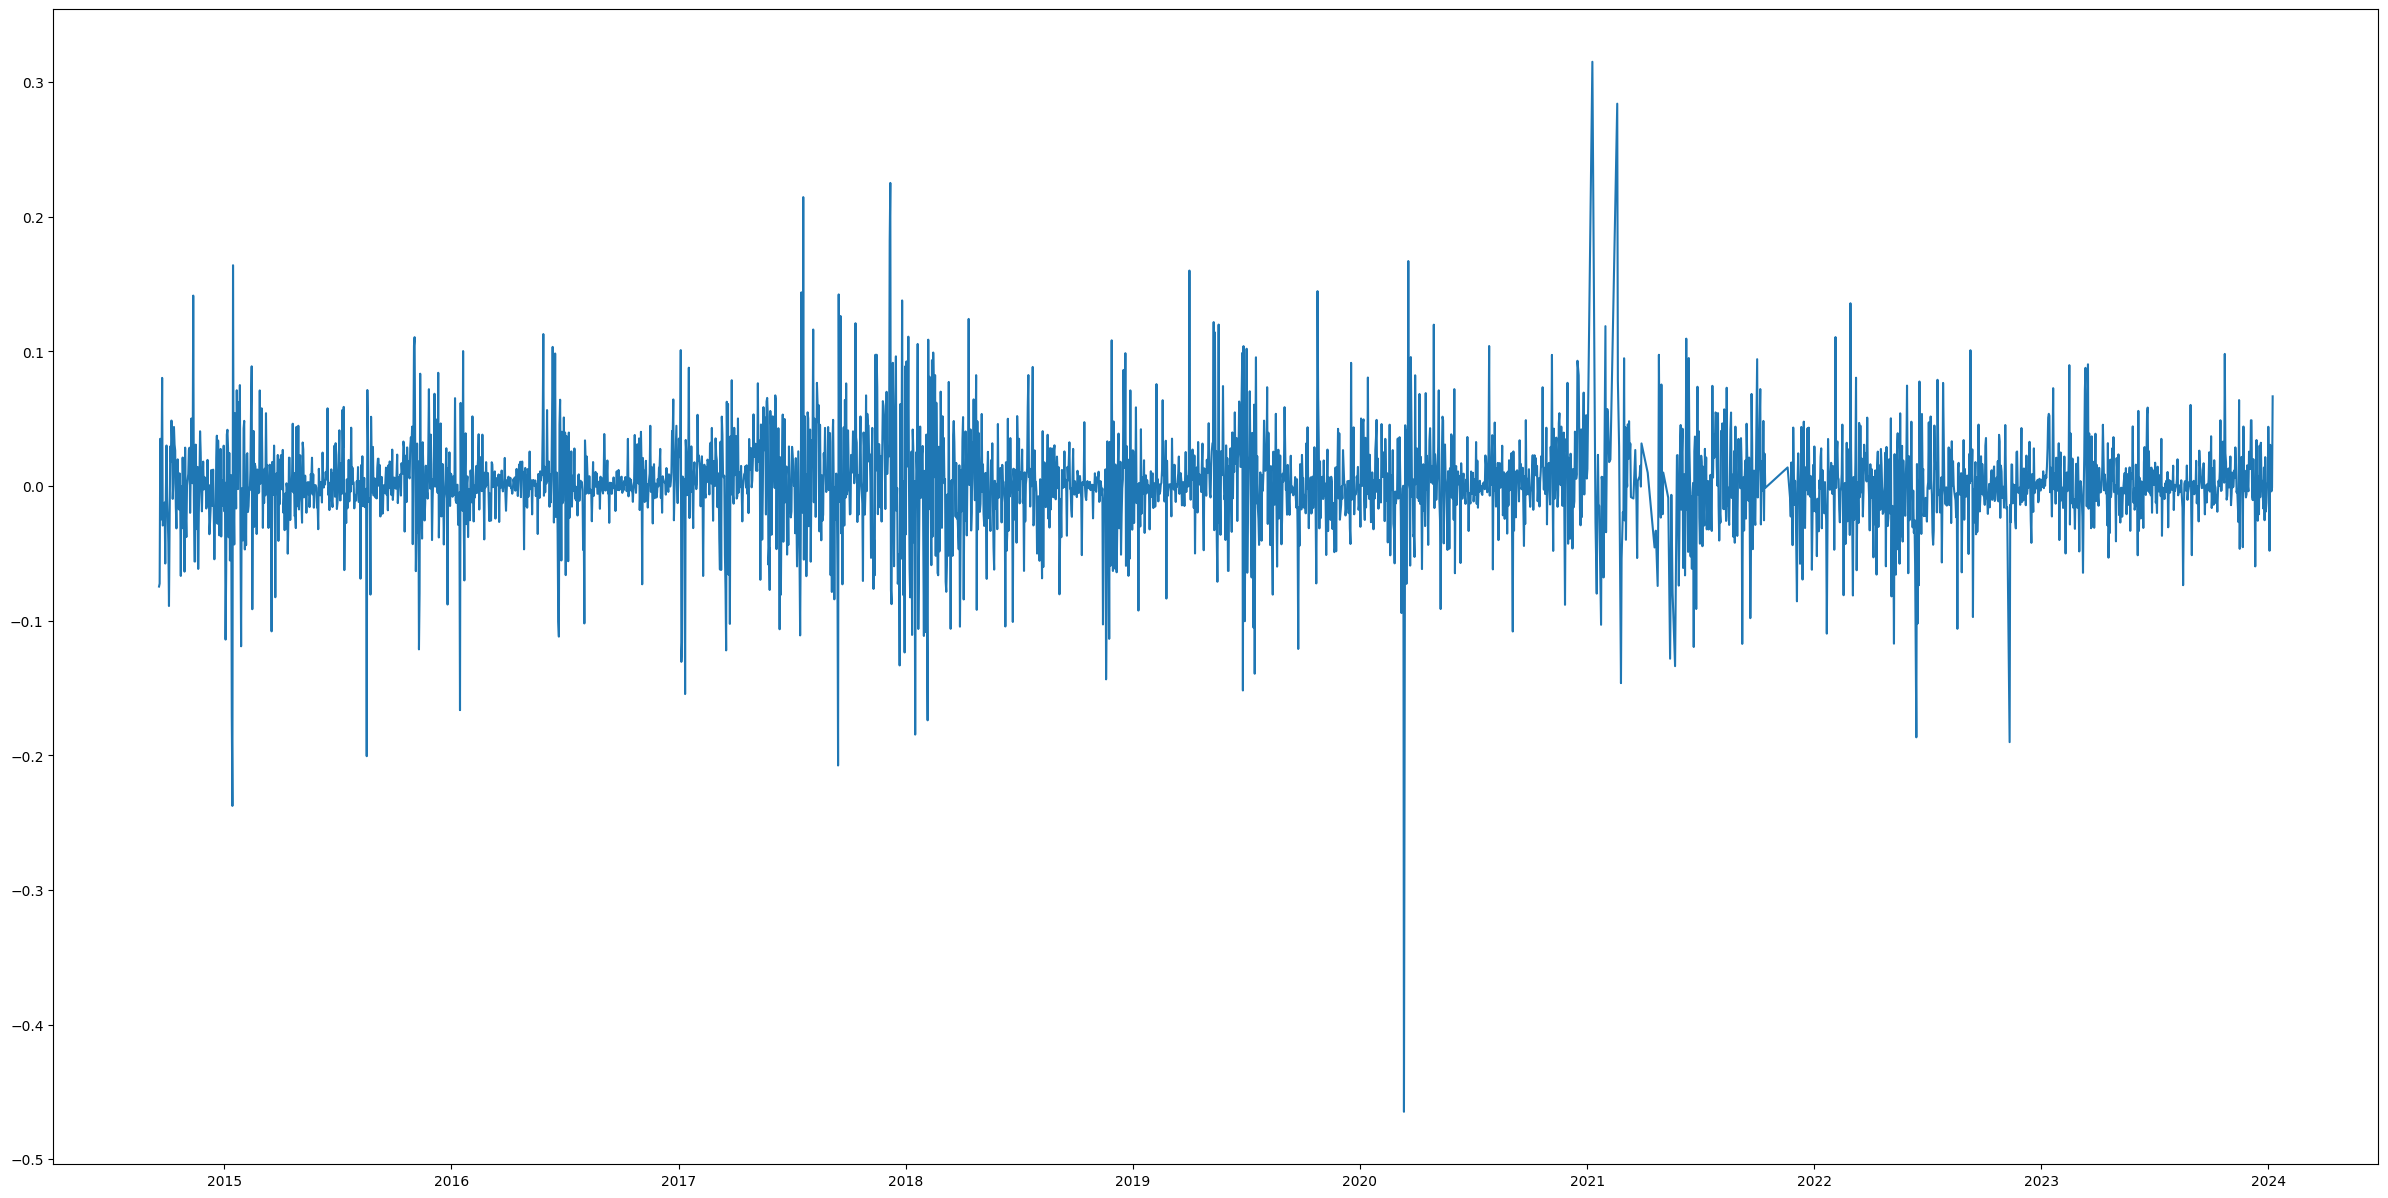

In [143]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

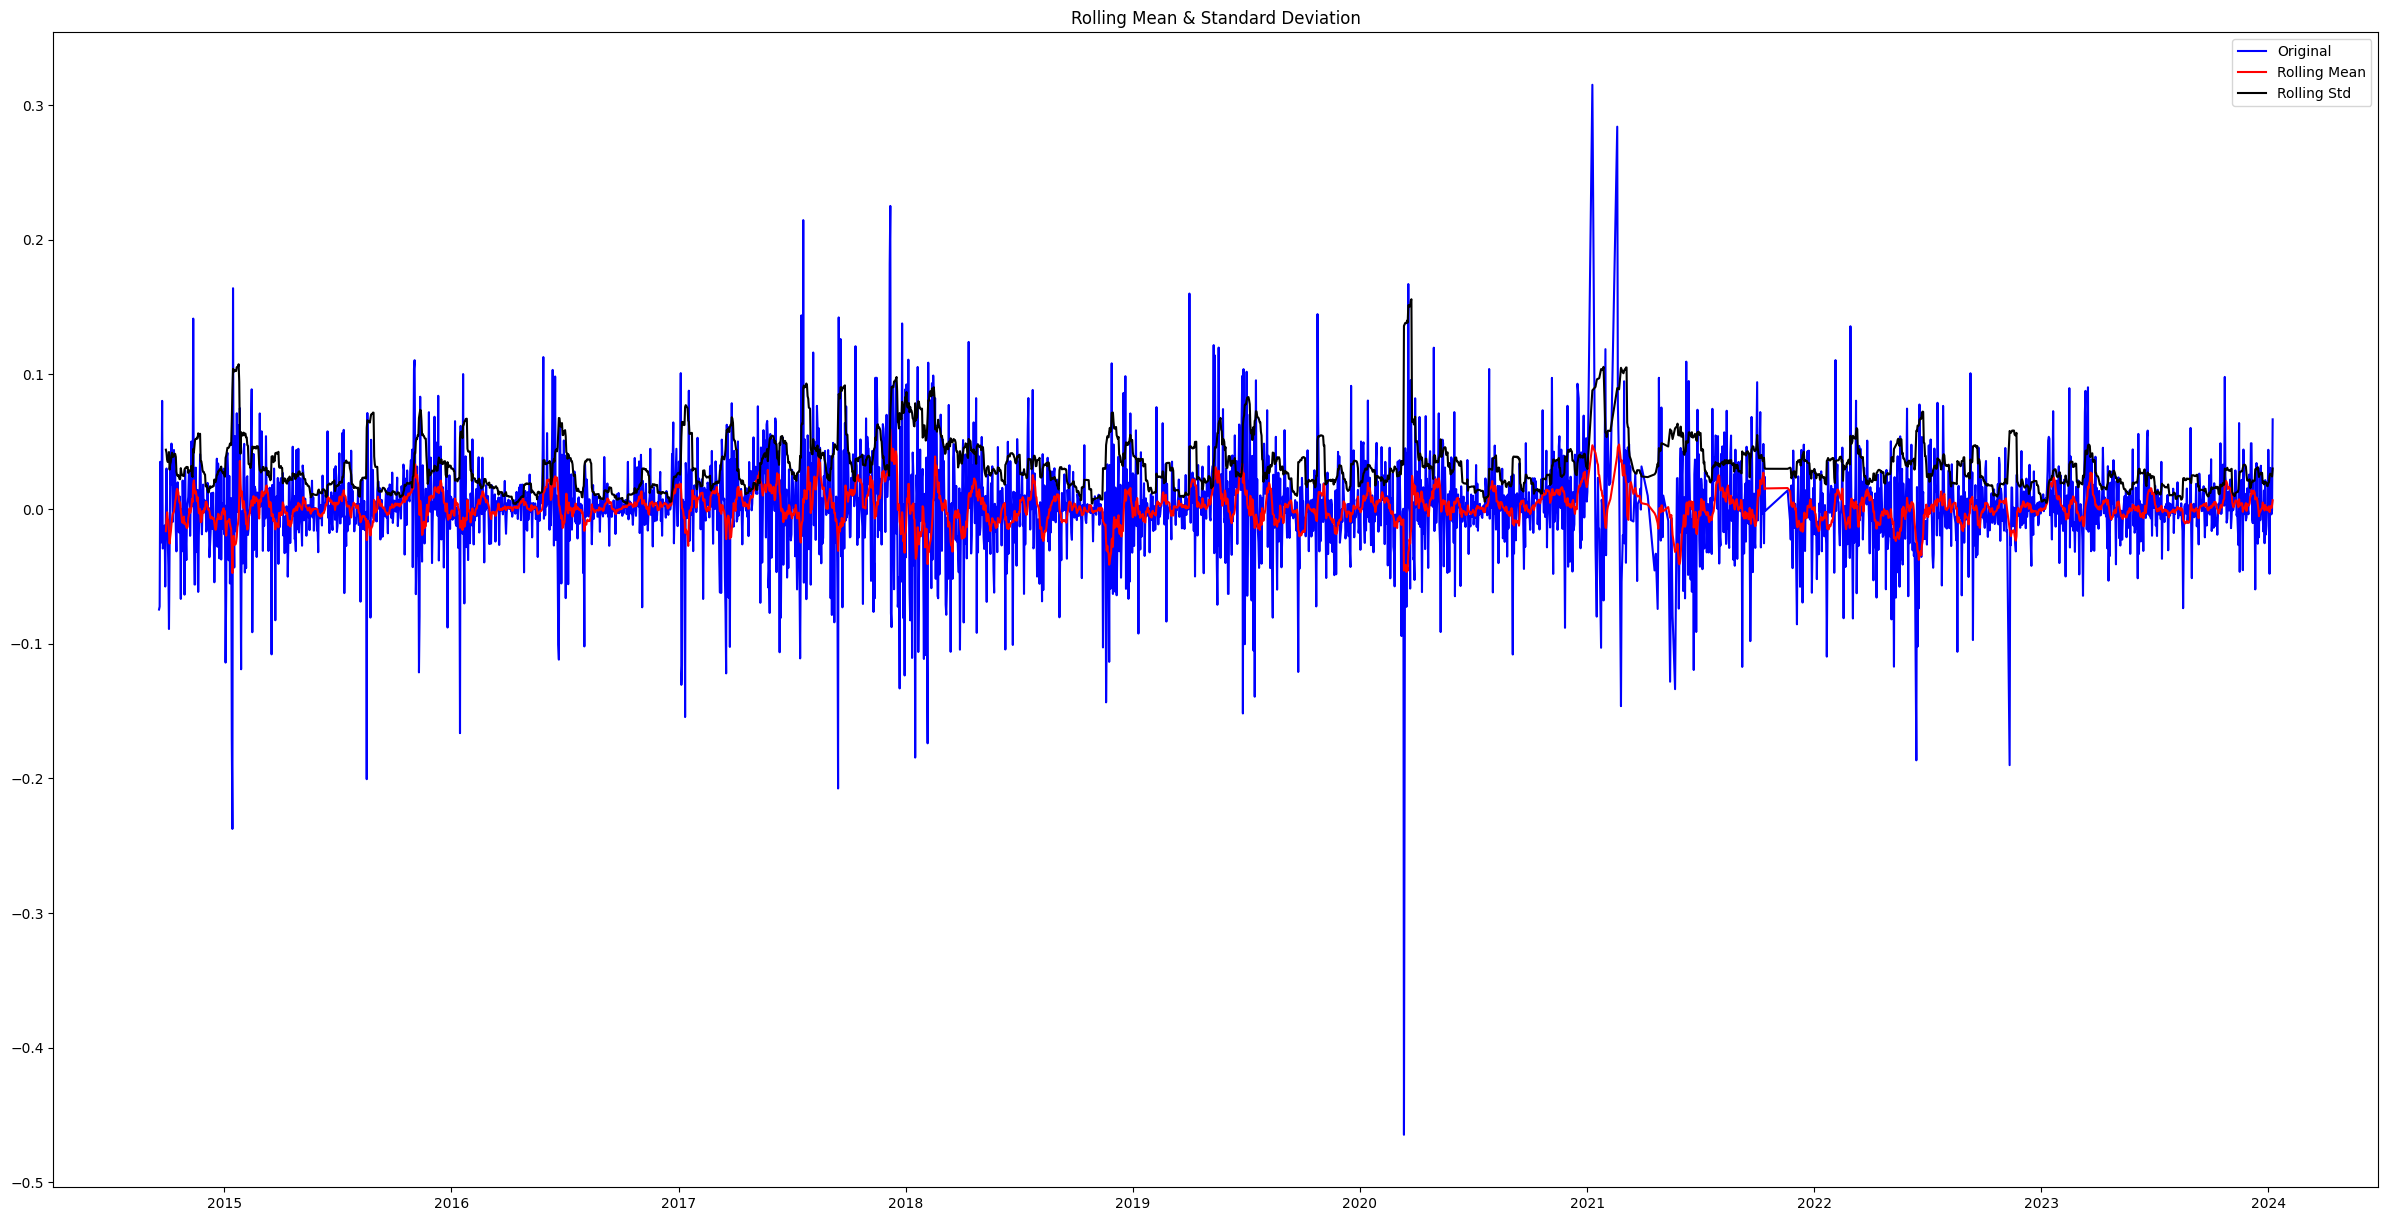

Results of Dickey-Fuller Test:
Test Statistic                  -56.696598
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    3274.000000
Critical Value (1%)              -3.432349
Critical Value (5%)              -2.862423
Critical Value (10%)             -2.567240
dtype: float64


In [144]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

With a p-value of 0.000000, which is less than any conventional significance level (e.g., 0.05 or 0.01), we reject the null hypothesis. This suggests that the time series is likely stationary.

The ACF and PACF plots for the TS after differencing can be plotted as:

In [145]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

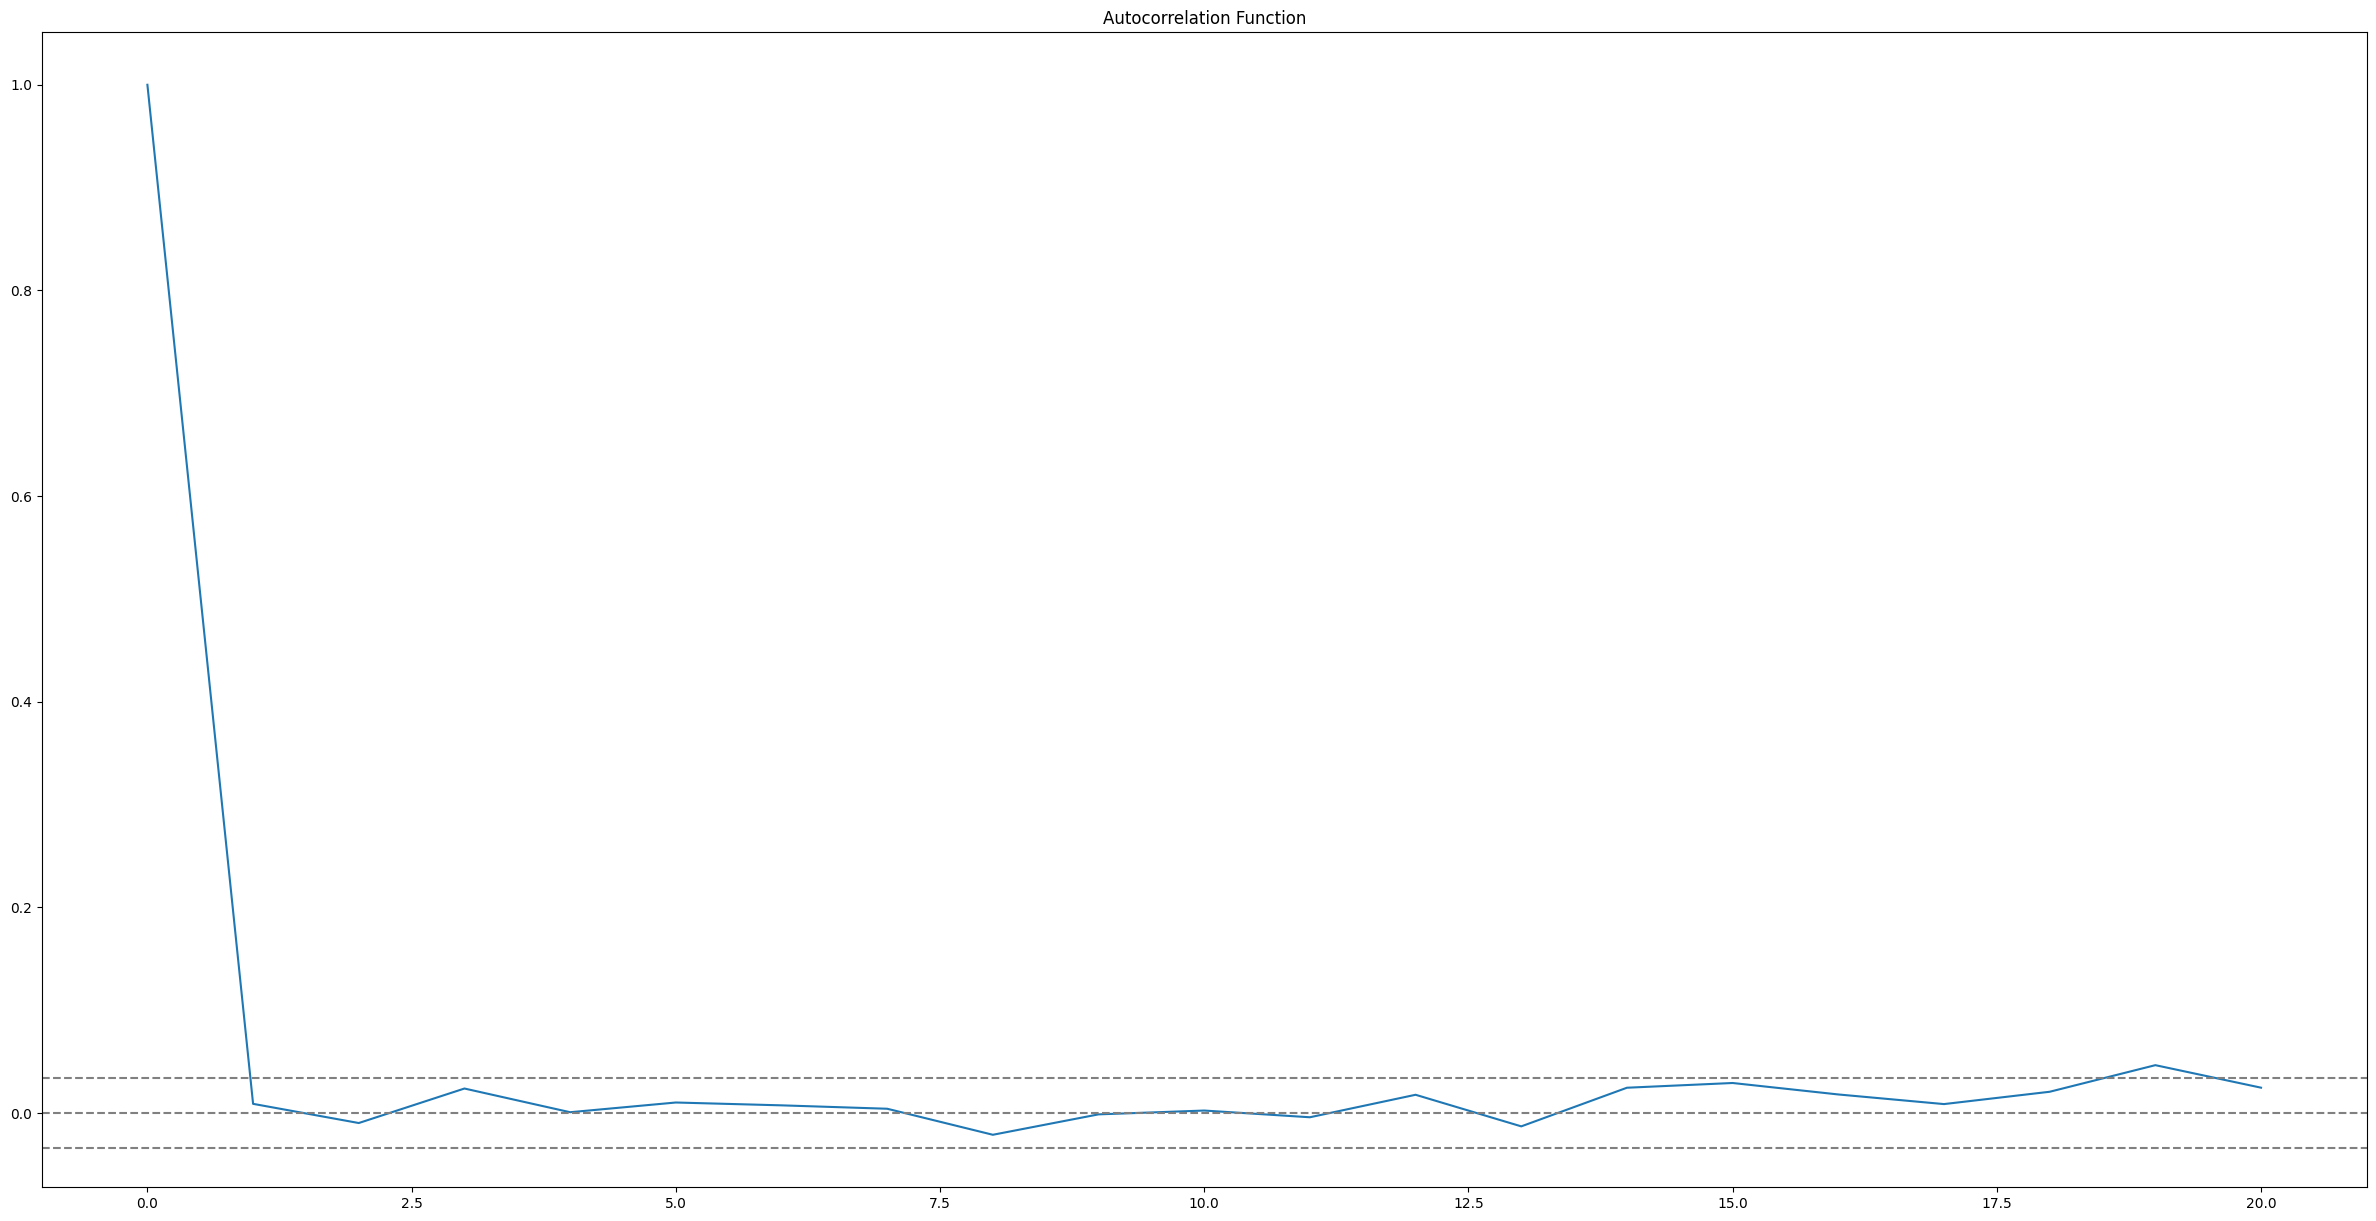

In [146]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

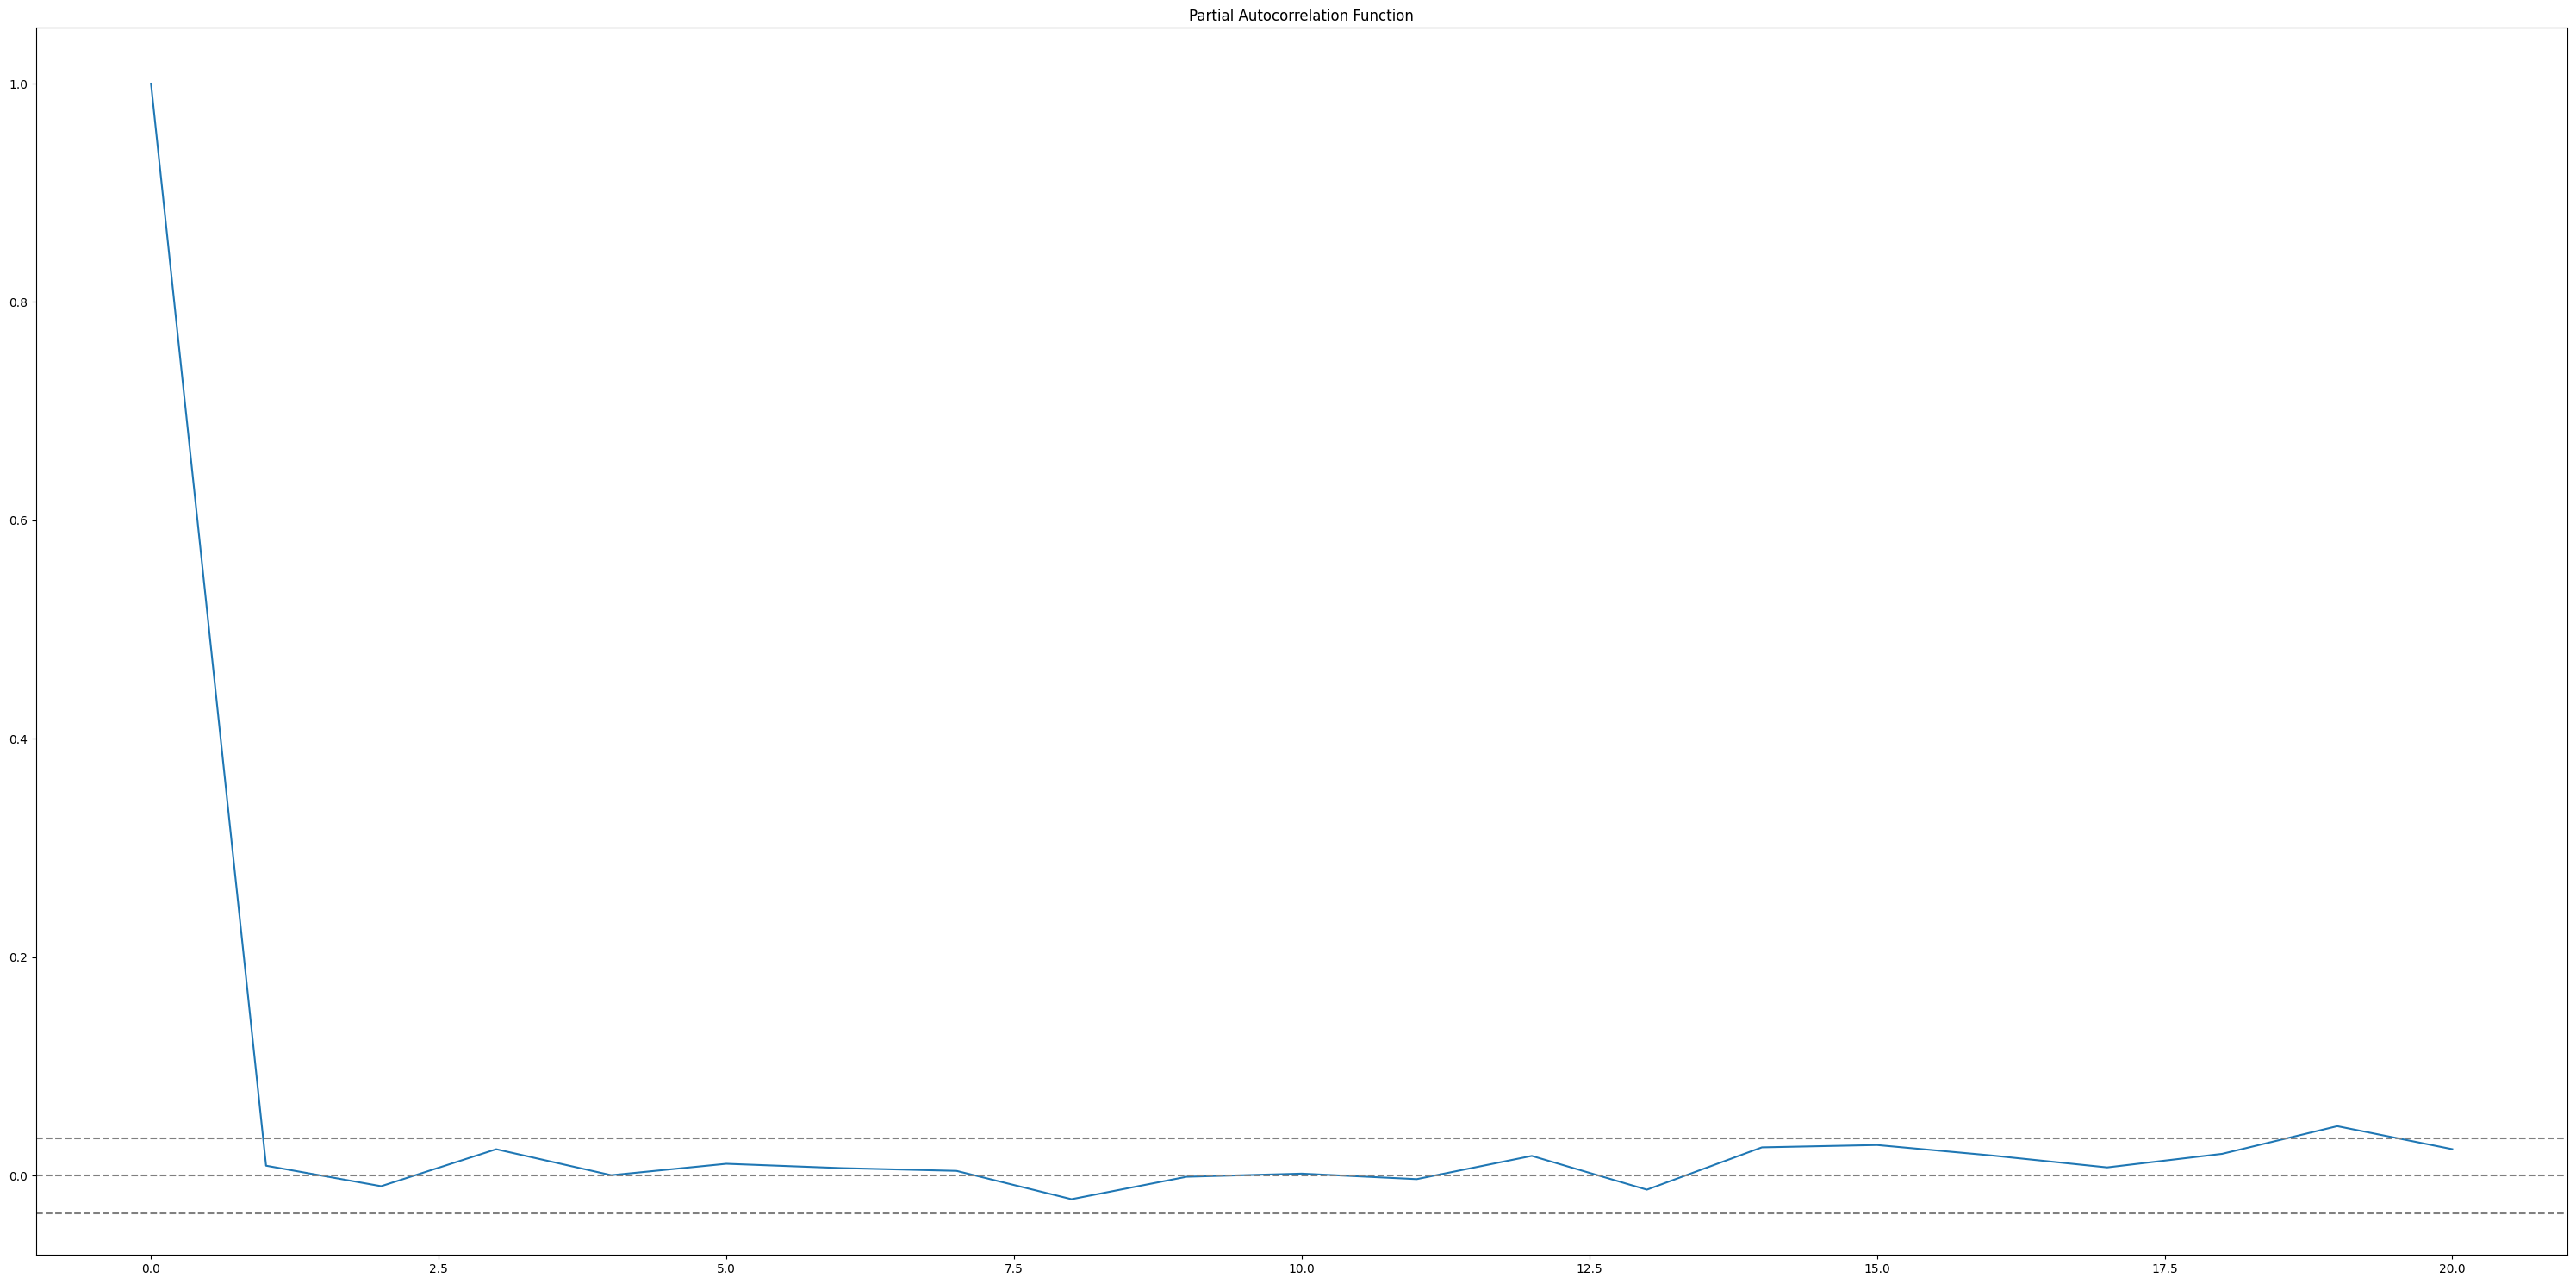

In [147]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In this plot, the two dotted lines on either sides of 0 are the confidence intervals. These can be used to determine the ‘p’ and ‘q’ values as:

_p_: The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2

_q_: The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2

#### Predicting values for next 5 days

In [148]:
from statsmodels.tsa.arima.model import ARIMA

In [149]:
X = predict_df['Adj Close'].values
last_date = predict_df.index[-1] + datetime.timedelta(days=1)
window = 5

predictions = {}

model = ARIMA(X, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=1)
X = np.append(X, forecast)
predictions[str(last_date.date())] = forecast

for t in range(window):
    last_date = last_date + datetime.timedelta(days=1)
    model = ARIMA(X, order=(2,1,2))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    X = np.append(X, forecast)
    predictions[str(last_date.date())] = forecast

for date, forecast in predictions.items():
    print(f"{date}: {forecast}")

2024-01-09: [47018.13468338]
2024-01-10: [46952.27516164]
2024-01-11: [46994.76369196]
2024-01-12: [46991.00883283]
2024-01-13: [46960.27888921]
2024-01-14: [46998.93499926]
